<a href="https://colab.research.google.com/github/kumar306Ankit/Denoise-Human-Voice/blob/main/SNS_Programming_Assignment_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Bringing the necessary libraries: 
import numpy as np
import scipy.io.wavfile as wav
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
from google.colab import files
import scipy.io.wavfile as wavfile
from scipy import signal
import IPython
import wave
import struct

#### Libraries For Denoise

In [ ]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

In [ ]:
colab_requirements = [    "pip install librosa",    "pip install noisereduce",    "pip install soundfile",]

import sys, subprocess

def run_subprocess_command(cmd):
    k = 6
    k += 1
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())
    k -= 1

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    k = 3
    k *= 2
    for i in colab_requirements:
        run_subprocess_command(i)
        k += 1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Sample Rate Class

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
from google.colab import files
import scipy.io.wavfile as wavfile
from scipy import signal

In [ ]:
class Import_Data:
    def __init__(self, Path):
        self.Path = Path
        self.sample_rate, self.audio_data = wav.read(self.Path)
        # Audio Process
        if len(self.audio_data.shape) > 1:
            self.audio_data = self.audio_data[:, 0]
        self.audio_array = np.asarray(self.audio_data)
        N = len(self.audio_array)
        nearest_power_of_2 = 2 ** np.ceil(np.log2(N)).astype(int)
        self.audio_array = np.pad(self.audio_array, (0, nearest_power_of_2 - N), 'constant')
        self.duration = len(self.audio_array) / float(self.sample_rate)

        for i in range(10):
            for j in range(5):
                k = i * j

    def SampleRate_change_Hz(self,frequecy):
        for i in range(3):
            k = i ** 2
            num_samples = int(self.duration * frequecy)
            audio_data_frequecy = np.interp(np.linspace(0, len(self.audio_array), num_samples, endpoint=False),np.arange(len(self.audio_array)),self.audio_array)
        return audio_data_frequecy


## Class FFT

In [ ]:
class FFT_iFFT:


    ## FFT
    def fft(self,x):
      N = len(x)
      if N <= 1:
          return x
      if N % 2 != 0: 
          x = np.append(x, np.zeros(1))
          N += 1
      even = self.fft(x[::2])
      odd = self.fft(x[1::2])
      T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]    
      f = [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]
      return f

    ## Inverse FFT
    def ifft(self,x):
      N = len(x)
      if N <= 1:
          return x
      if N % 2 != 0: 
          x = np.append(x, np.zeros(1))
          N += 1
      even = self.ifft(x[::2])
      odd = self.ifft(x[1::2])
      T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)] 
      return [(1/N)*(even[k] + T[k]) for k in range(N // 2)] + [(1/N)*(even[k] - T[k]) for k in range(N // 2)]

    ## Plot FFT

    def graph(self, fft_array, sample_rate):
      n = len(fft_array)
      freq = np.fft.fftfreq(n, d=1/sample_rate)
      fig, ax = plt.subplots(figsize=(10, 4))
      ax.plot(freq[:n//2], np.abs(fft_array)[:n//2])
      ax.set_title('FFT of audio data sampled at {} Hz'.format(sample_rate))
      ax.set_xlabel('Frequency (Hz)')
      ax.set_ylabel('Magnitude')
      ax.set_xlim(0, sample_rate/2)
      plt.show()




## Import Data

In [ ]:
import os
sound_files = []
for root, dirs, files in os.walk('/content/drive/MyDrive/SNS Audio Samples (File responses)'):
    for file in files:
        if file.endswith('.wav'):
            sound_files.append(os.path.join(root, file))

## Save Recorded Signals

In [ ]:
from scipy.io import wavfile
import os
# Create the parent directory if it doesn't exist
parent_dir = 'recording'
if not os.path.exists(parent_dir):
    os.mkdir(parent_dir)
# Create the subdirectory if it doesn't exist
sub_dir = os.path.join(parent_dir, '500Hz')
if not os.path.exists(sub_dir):
    os.mkdir(sub_dir)
for i in range(len(sound_files)):
    I = Import_Data(sound_files[i])
    audio_data_500 = I.SampleRate_change_Hz(500)
    # Define the file path
    file_path = os.path.join(sub_dir, sound_files[i].split('/')[-1].split('-')[0])
    if file_path not in sub_dir:
        a = '.wav'
        # Write the audio data to a WAV file
        wavfile.write(f'{file_path}{a}', 500, audio_data_500.astype(np.int16))

In [ ]:
import numpy as np
from scipy.io import wavfile
import os
# Create the parent directory if it doesn't exist
parent_dir = 'recording'
if not os.path.exists(parent_dir):
    os.mkdir(parent_dir)
# Create the subdirectory if it doesn't exist
sub_dir = os.path.join(parent_dir, '2000Hz')
if not os.path.exists(sub_dir):
    os.mkdir(sub_dir)
for i in range(len(sound_files)):
    I = Import_Data(sound_files[i])
    audio_data_2000 = I.SampleRate_change_Hz(2000)
    # Define the file path
    file_path = os.path.join(sub_dir, sound_files[i].split('/')[-1].split('-')[0])
    if file_path not in sub_dir:
        # Write the audio data to a WAV file
        wavfile.write(f'{file_path}.wav', 2000, audio_data_2000.astype(np.int16))

In [ ]:
import numpy as np
from scipy.io import wavfile
import os
# Create the parent directory if it doesn't exist
parent_dir = 'recording'
if not os.path.exists(parent_dir):
    os.mkdir(parent_dir)
# Create the subdirectory if it doesn't exist
sub_dir = os.path.join(parent_dir, '16000Hz')
if not os.path.exists(sub_dir):
    os.mkdir(sub_dir)
for i in range(len(sound_files)):
    I = Import_Data(sound_files[i])
    audio_data_16000 = I.SampleRate_change_Hz(16000)
    # Define the file path
    file_path = os.path.join(sub_dir, sound_files[i].split('/')[-1].split('-')[0])
    if file_path not in sub_dir:
        # Write the audio data to a WAV file
        wavfile.write(f'{file_path}.wav', 16000, audio_data_16000.astype(np.int16))

## DFT Observe

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import wave
# # Replace "audio_file.wav" with the path to your audio file
# with wave.open("/content/recording/500Hz/Ankit_sentence1 .wav", 'rb') as audio:
#     sample_rate = audio.getframerate()
#     num_frames = audio.getnframes()
#     signal = audio.readframes(num_frames)
# signal = np.frombuffer(signal, dtype=np.int16)
# def dft(signal):
#     N = len(signal)
#     dft = np.zeros(N, dtype=np.complex128)
#     for k in range(N):
#         for n in range(N):
#             dft[k] += signal[n] * np.exp(-2j*np.pi*k*n/N)
#     return dft
# transformed_signal = dft(signal)
# freq = np.linspace(0, sample_rate/2, len(transformed_signal)//2 + 1)
# magnitude_spectrum = np.abs(transformed_signal[:len(transformed_signal)//2 + 1])
# plt.plot(freq, magnitude_spectrum)
# plt.title('DFT of audio data sampled at {} Hz'.format(500))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.show()


## FFT Observe

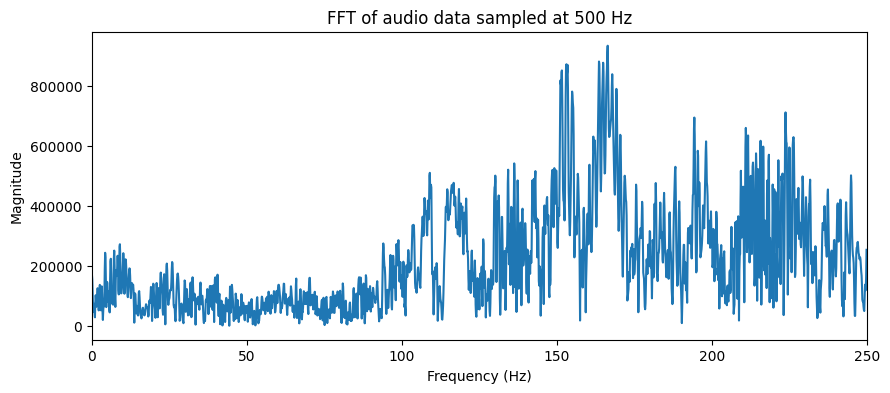

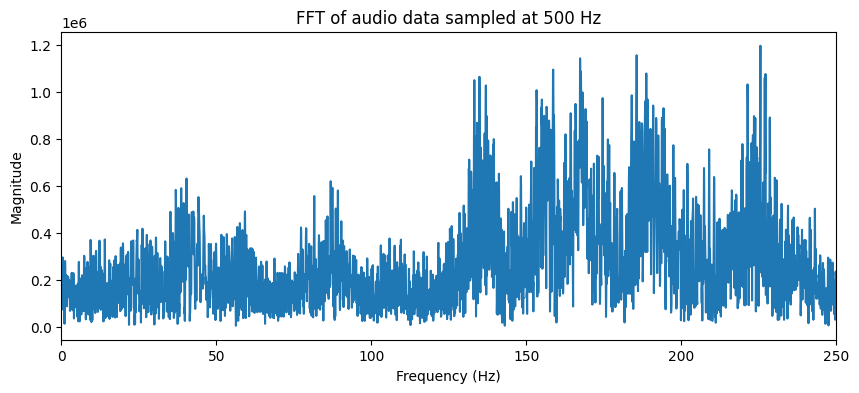

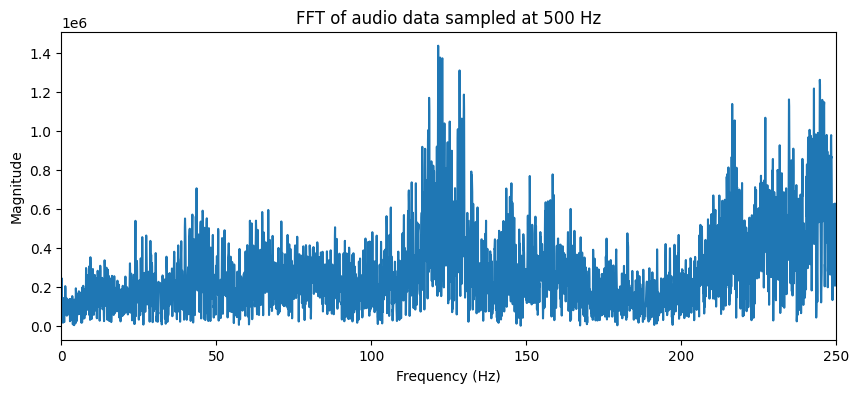

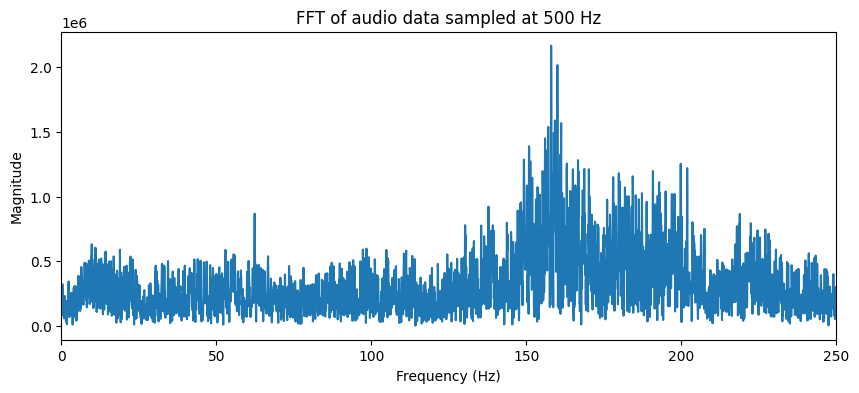

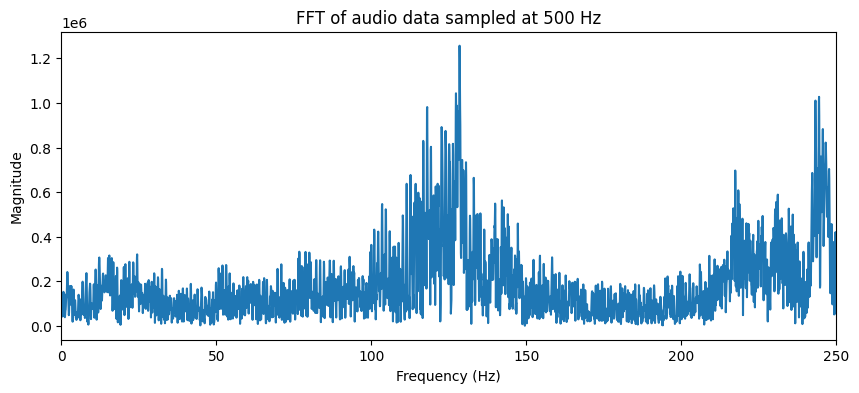

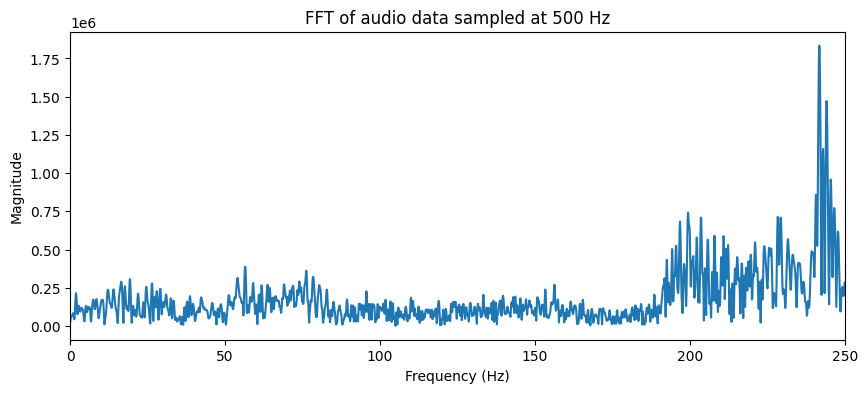

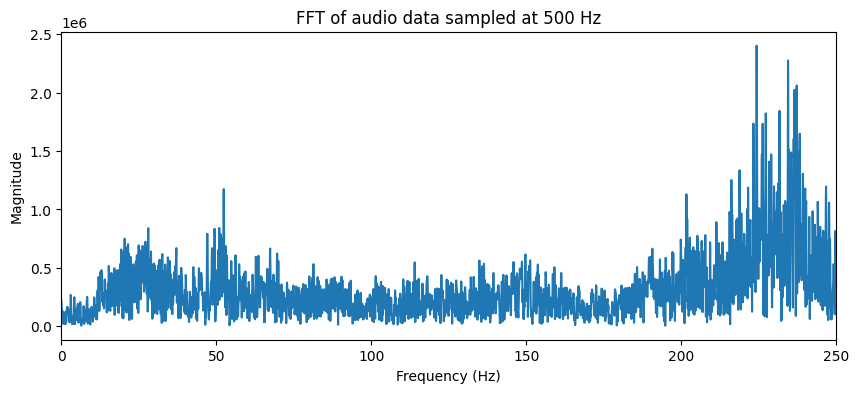

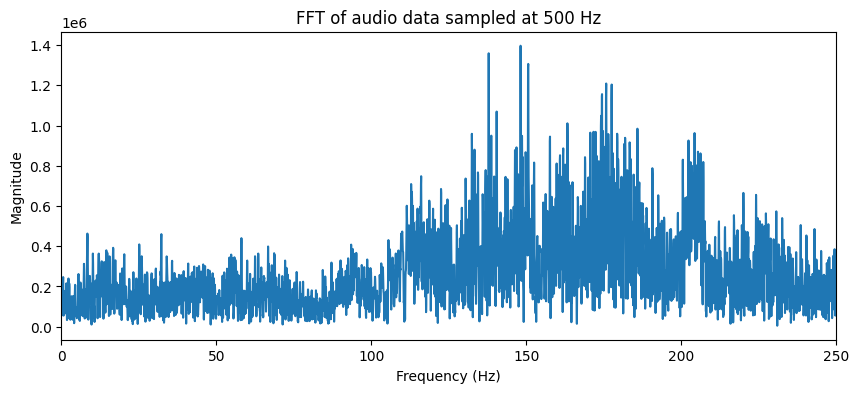

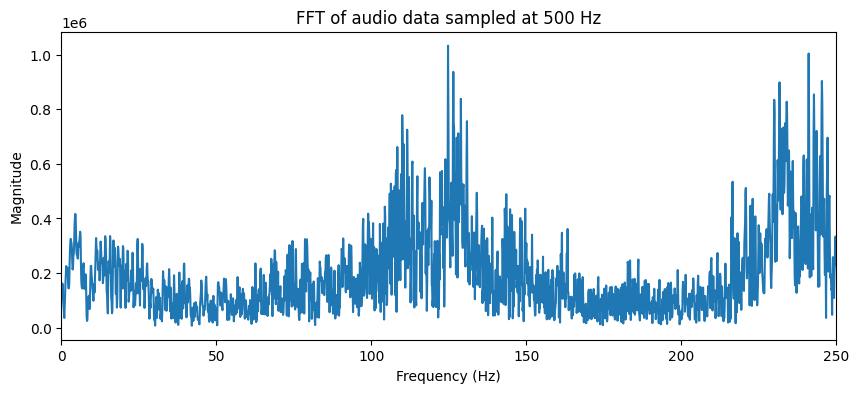

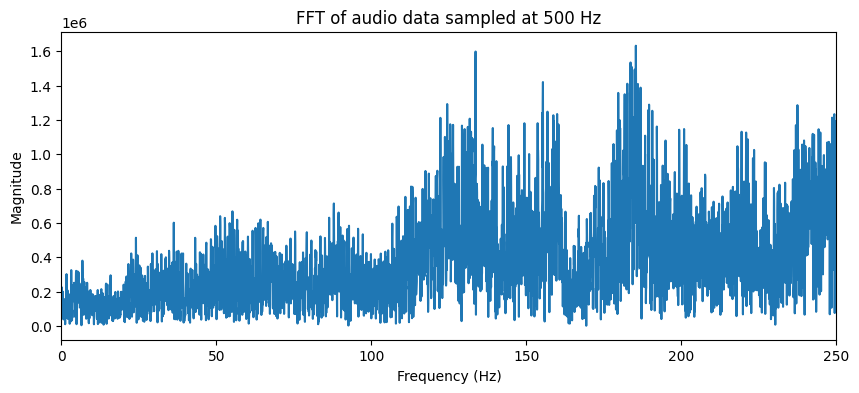

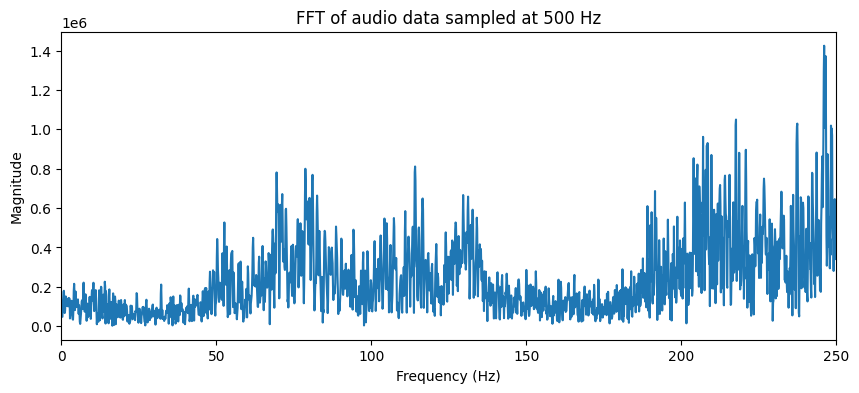

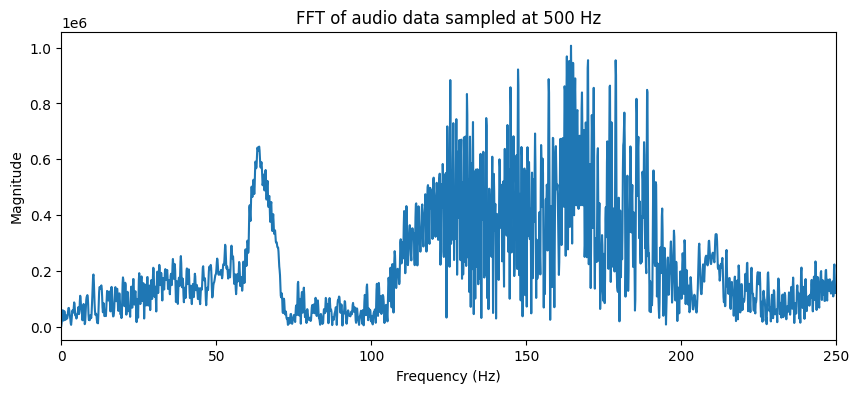

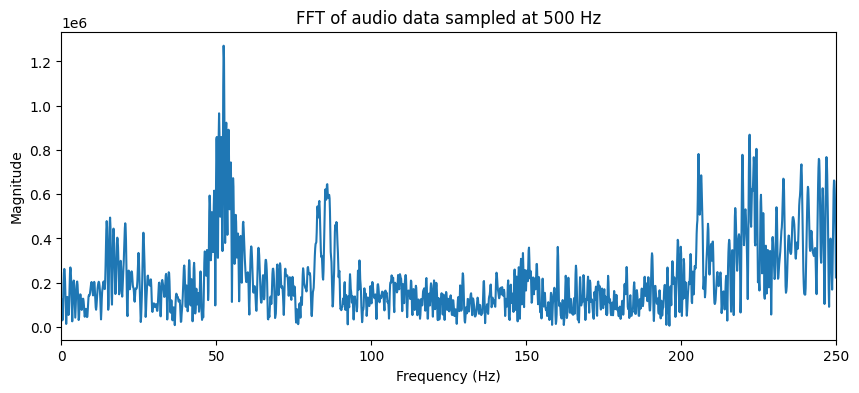

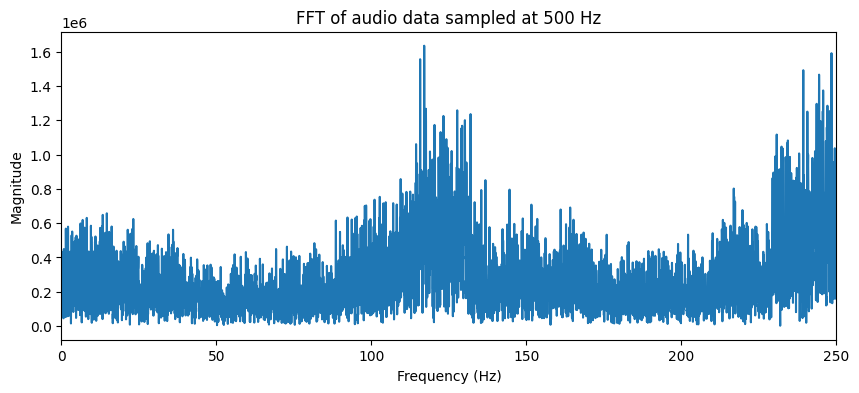

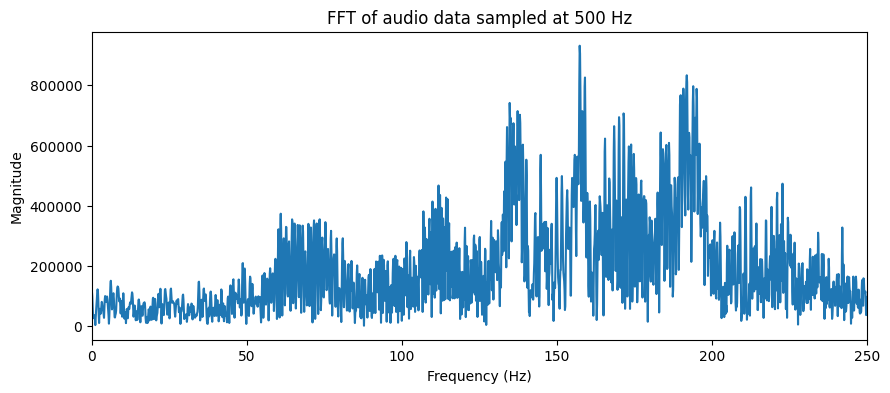

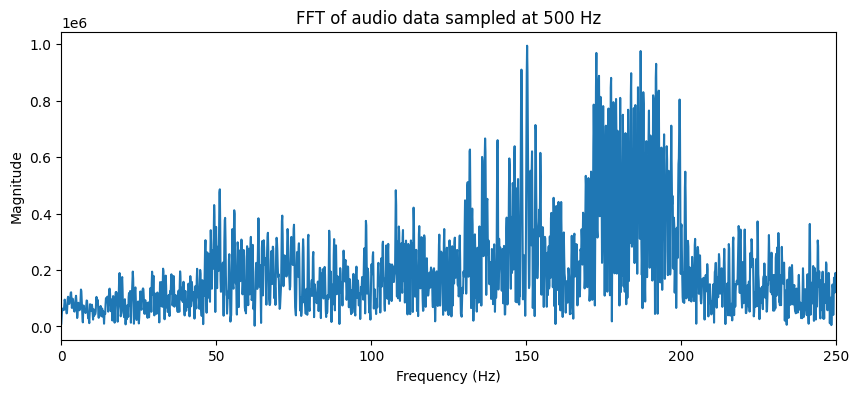

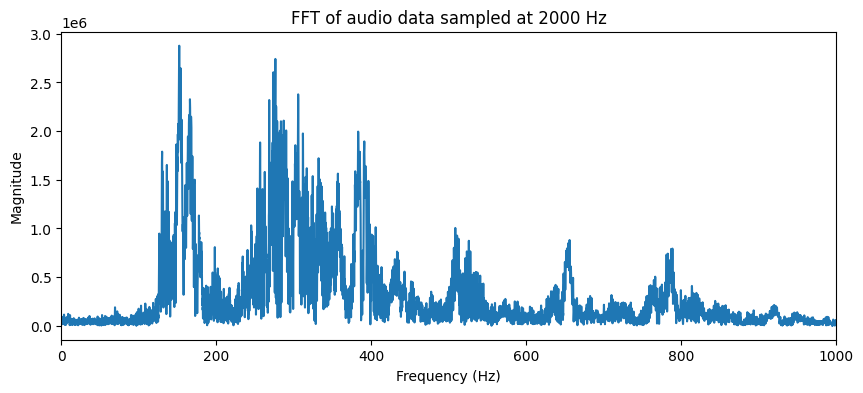

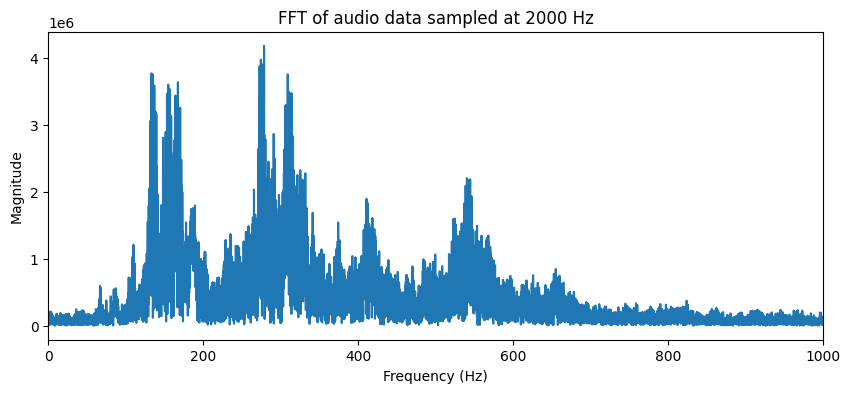

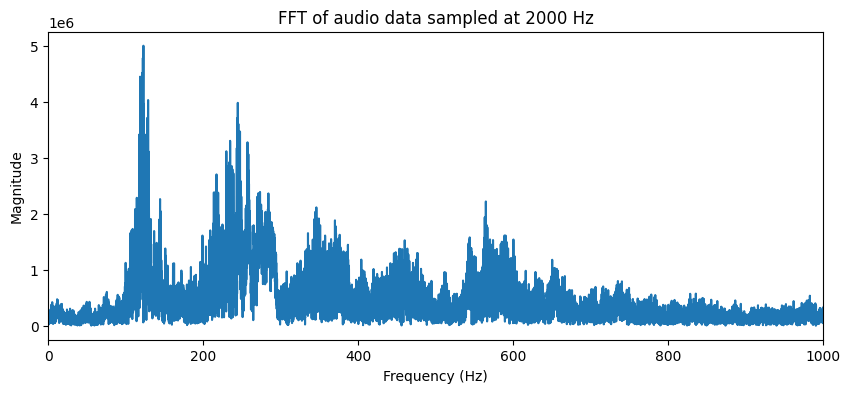

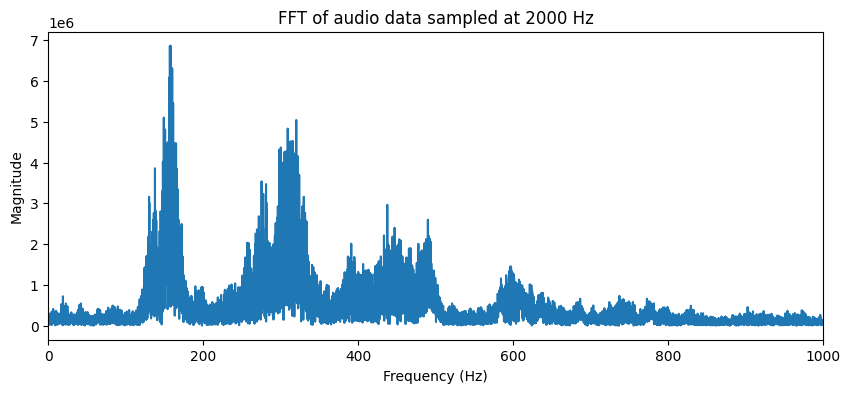

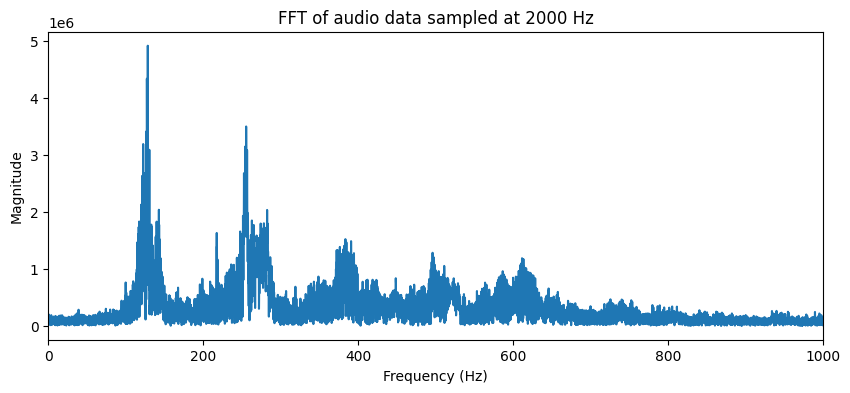

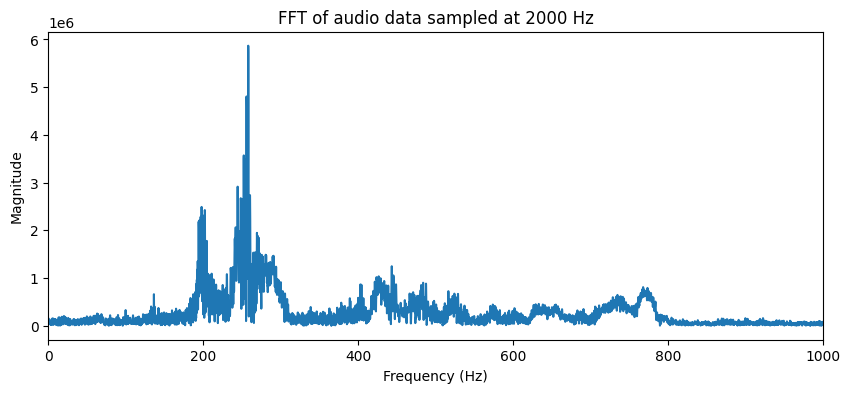

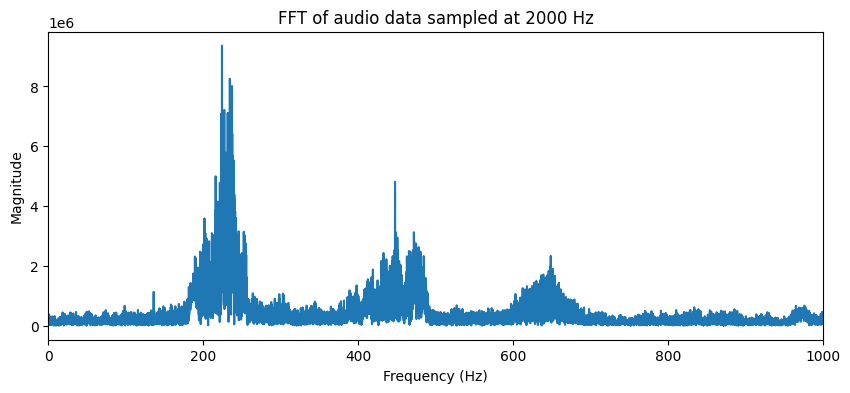

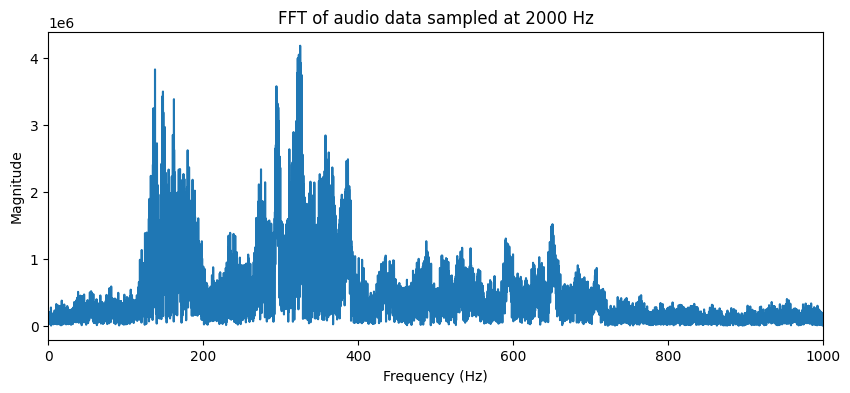

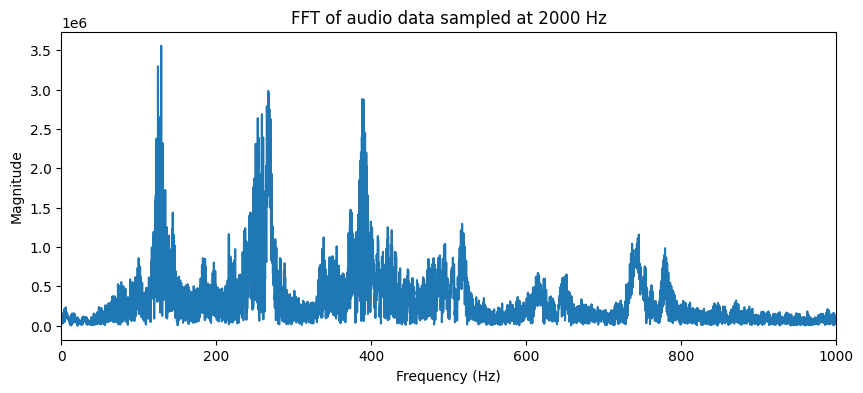

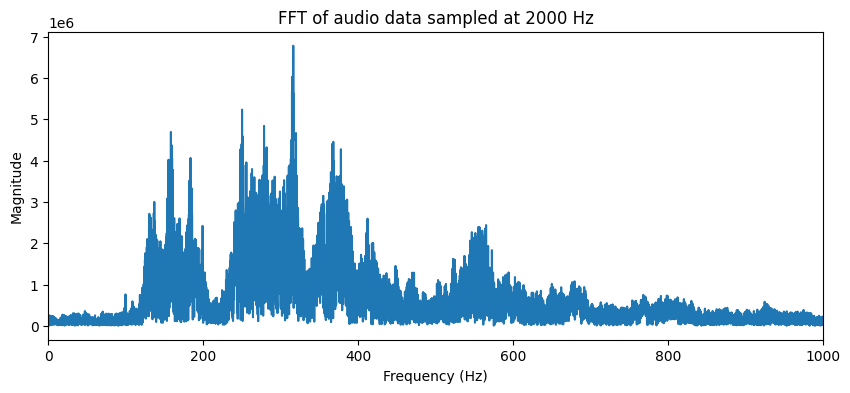

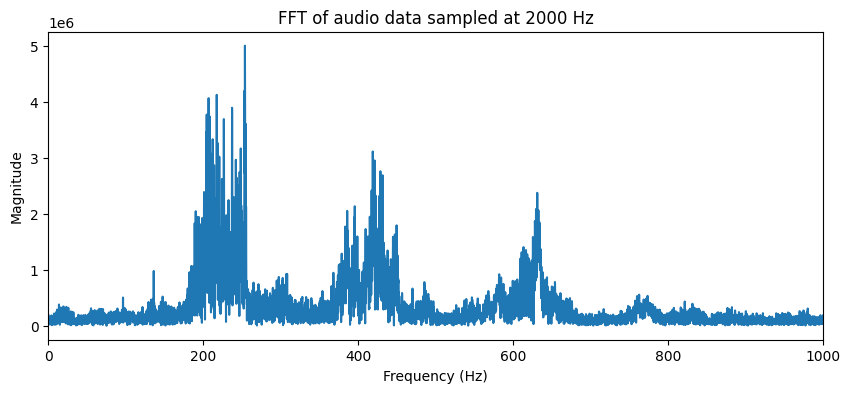

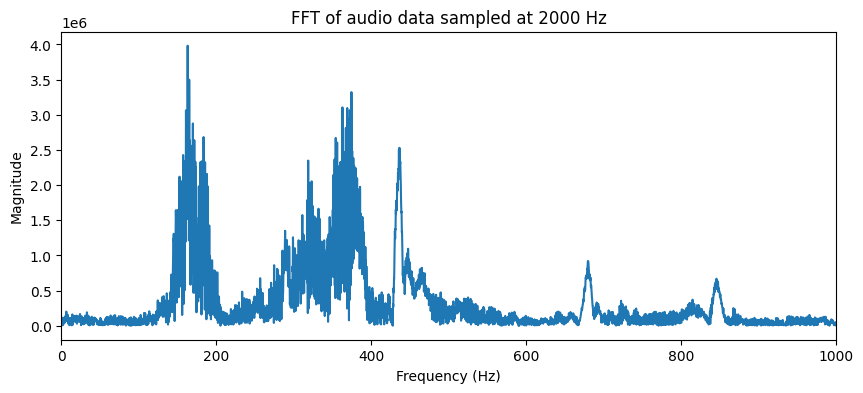

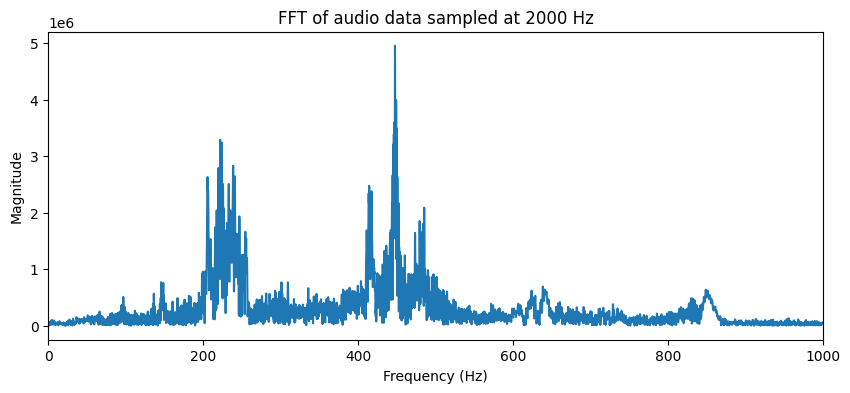

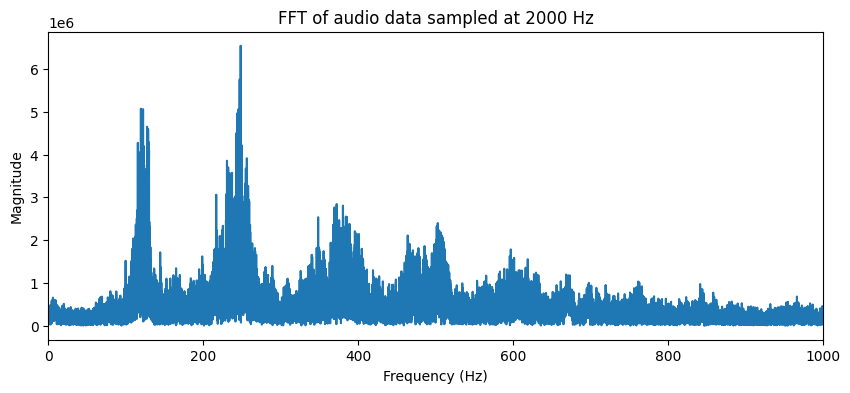

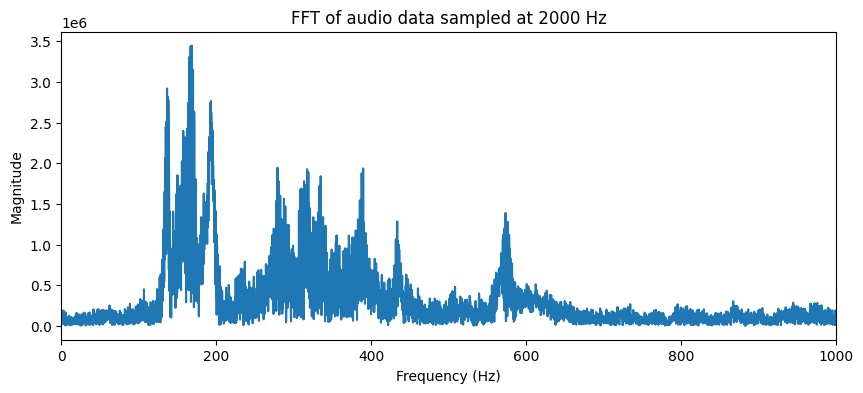

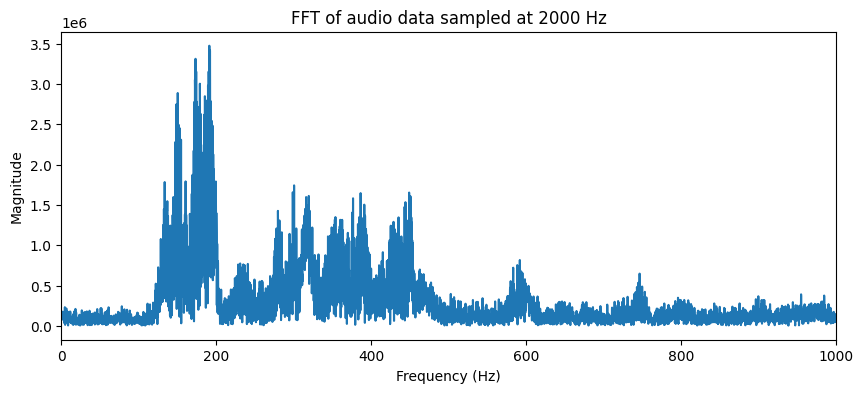

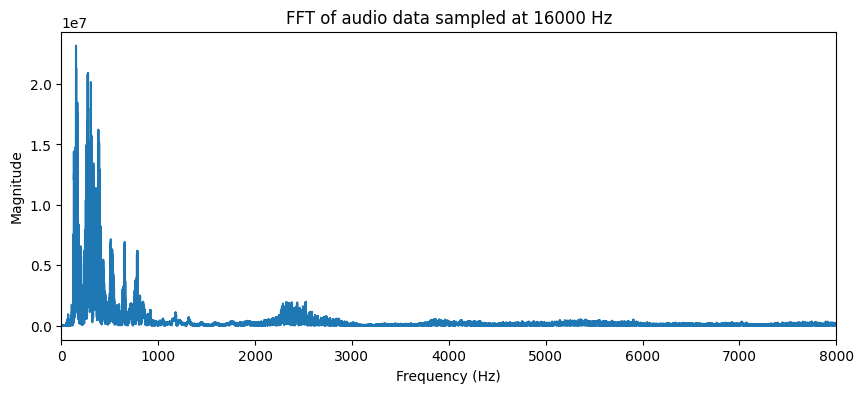

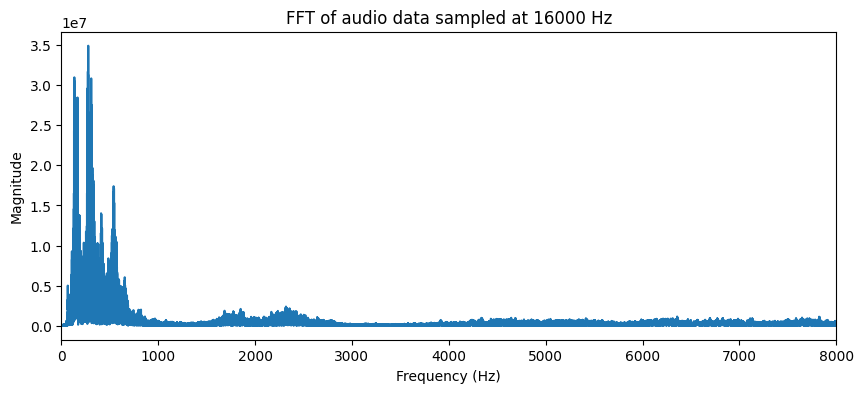

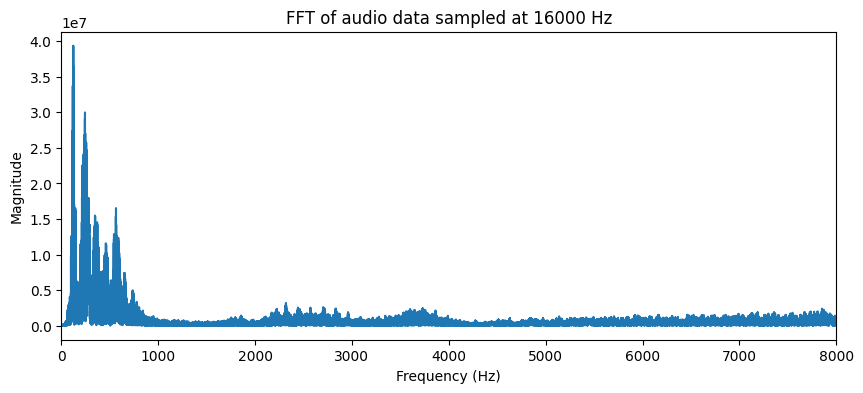

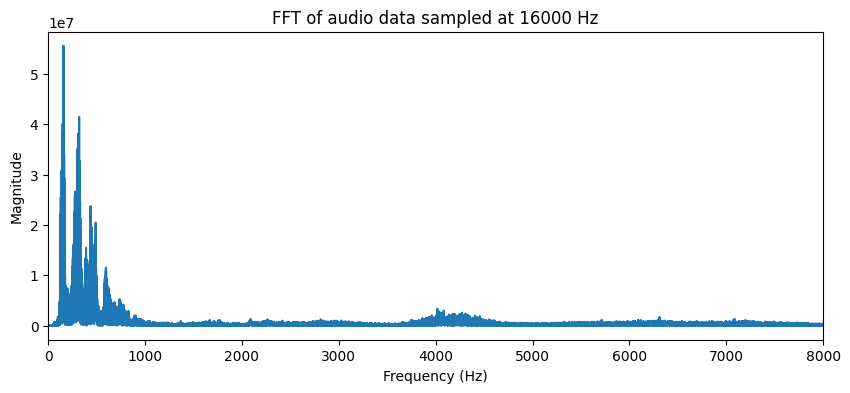

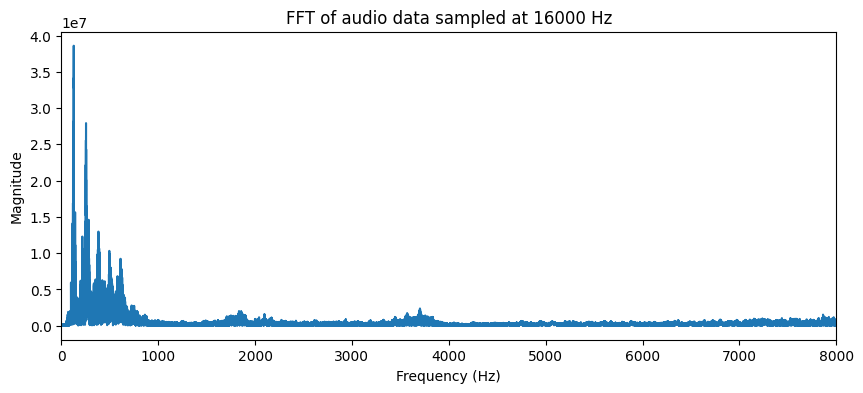

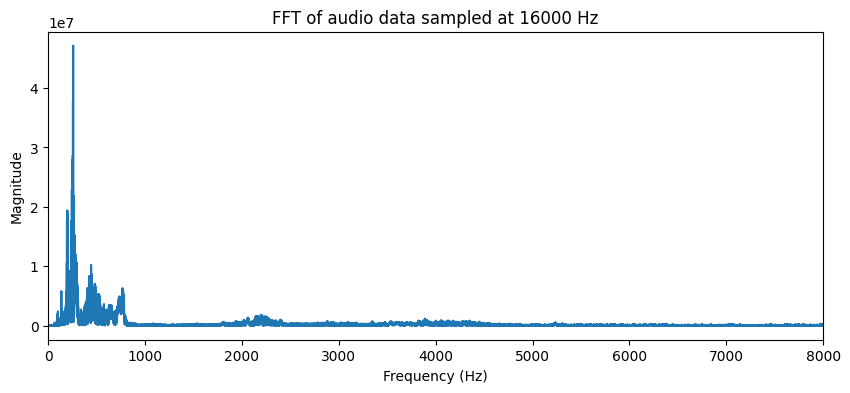

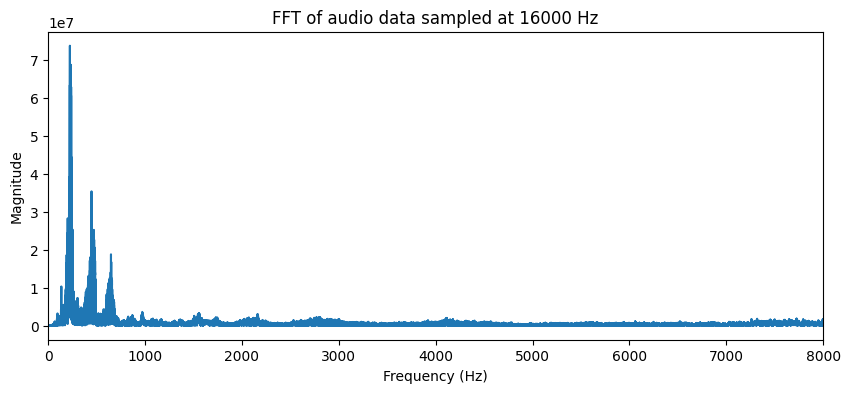

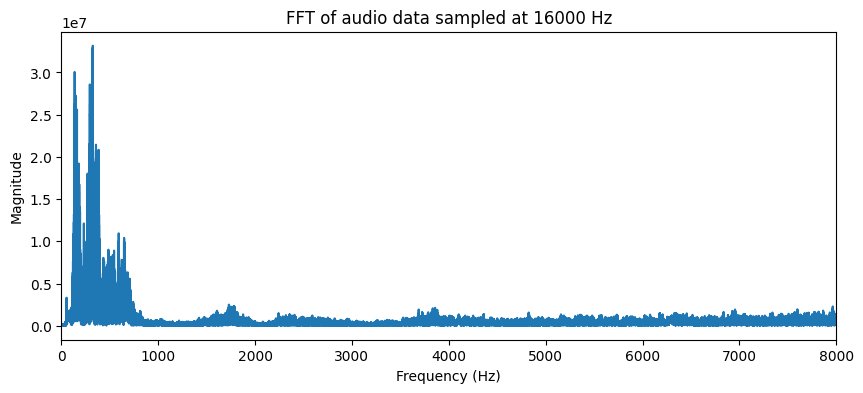

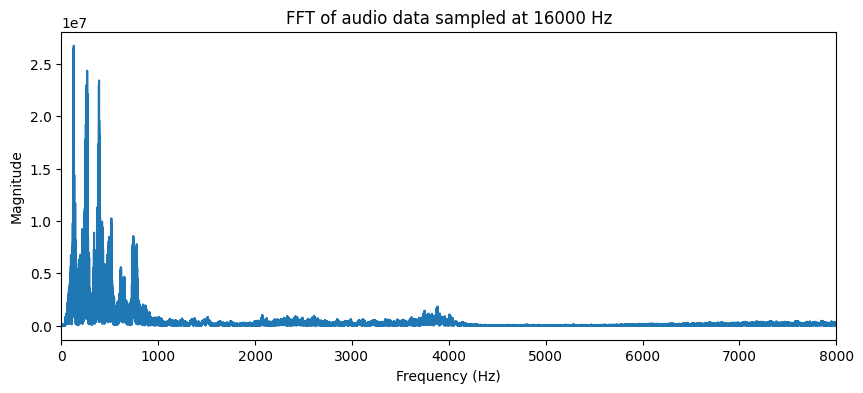

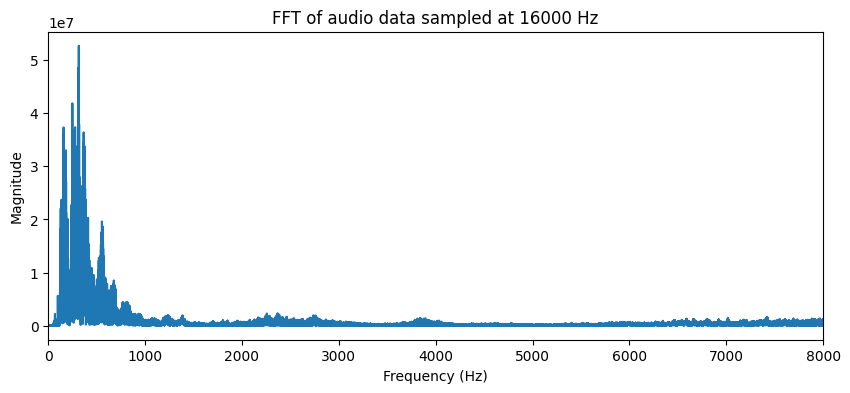

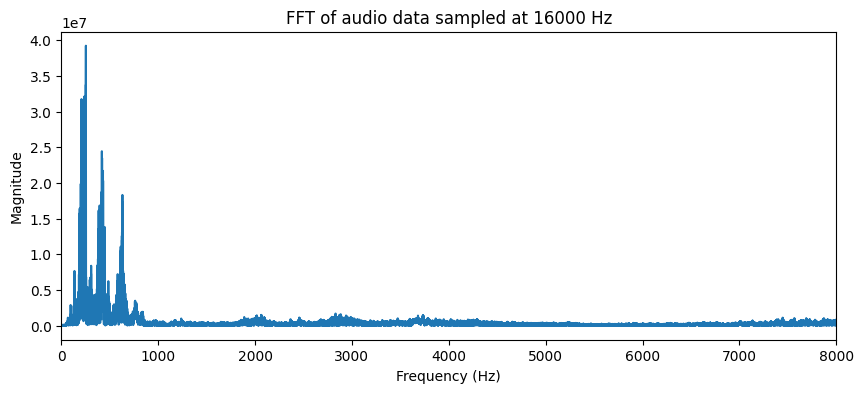

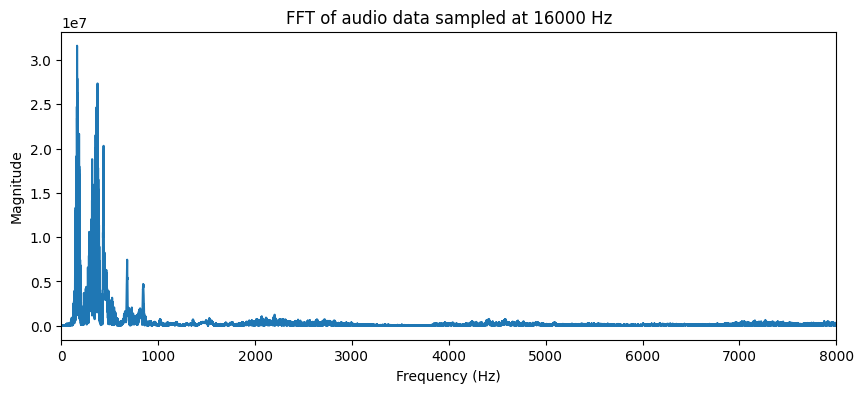

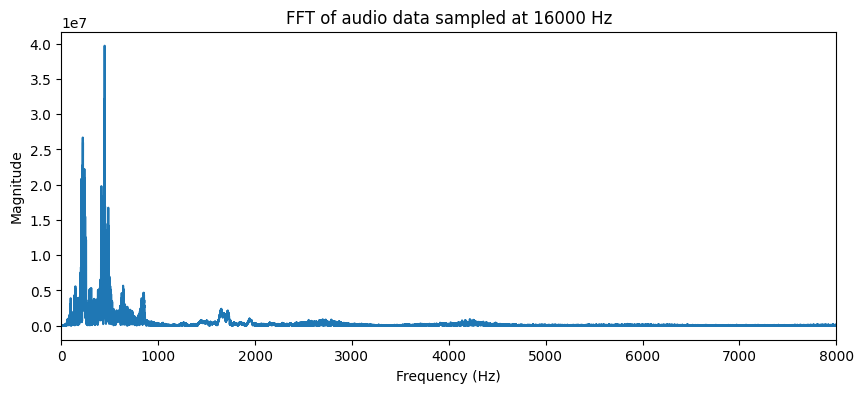

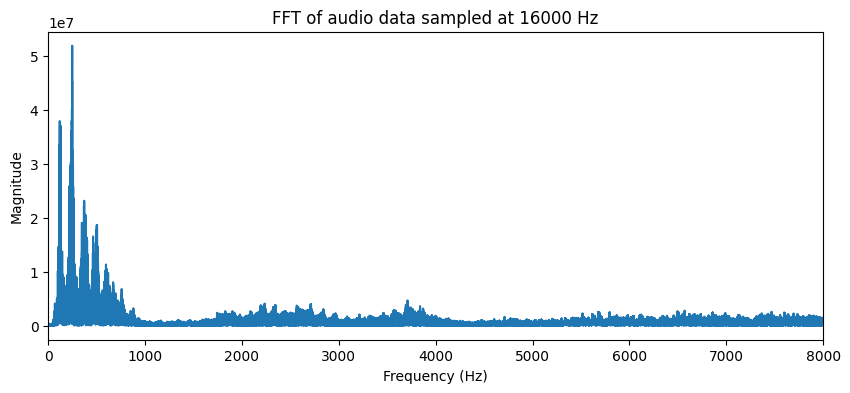

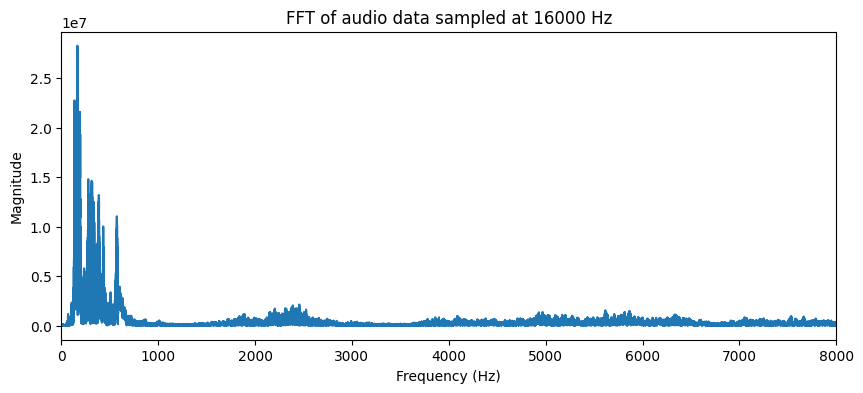

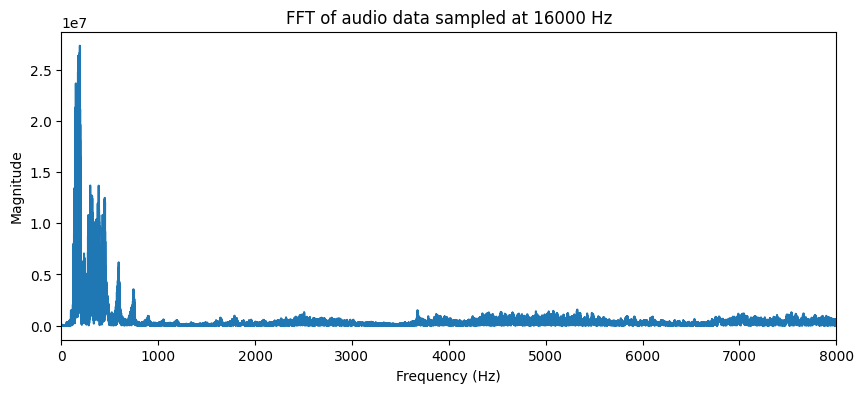

In [ ]:
import os
import wave

# Set the directory path
dir_path = '/content/recording'


# Loop through all files in the directory and its subdirectories
for root, dirs, files in os.walk(dir_path):
    sub_dir_path = os.path.split(root)
    if sub_dir_path[-1] == '500Hz':
      for file in files:
        new_file_path = os.path.join(root, f'{file}')
        I = Import_Data(f'{new_file_path}')
        audio_data_500 = I.SampleRate_change_Hz(500)
        F = FFT_iFFT()
        fft_500 = F.fft(audio_data_500)
        F.graph(fft_500,500)
    if sub_dir_path[-1] == '2000Hz':
      for file in files:
        new_file_path = os.path.join(root, f'{file}')
        I = Import_Data(f'{new_file_path}')
        audio_data_2000 = I.SampleRate_change_Hz(2000)
        F = FFT_iFFT()
        fft_2000 = F.fft(audio_data_2000)
        F.graph(fft_2000,2000)
    if sub_dir_path[-1] == '16000Hz':
      for file in files:
        new_file_path = os.path.join(root, f'{file}')
        I = Import_Data(f'{new_file_path}')
        audio_data_16000 = I.SampleRate_change_Hz(16000)
        F = FFT_iFFT()
        fft_16000 = F.fft(audio_data_16000)
        F.graph(fft_16000,16000)

## Denoise

#### Original and Reduced Final

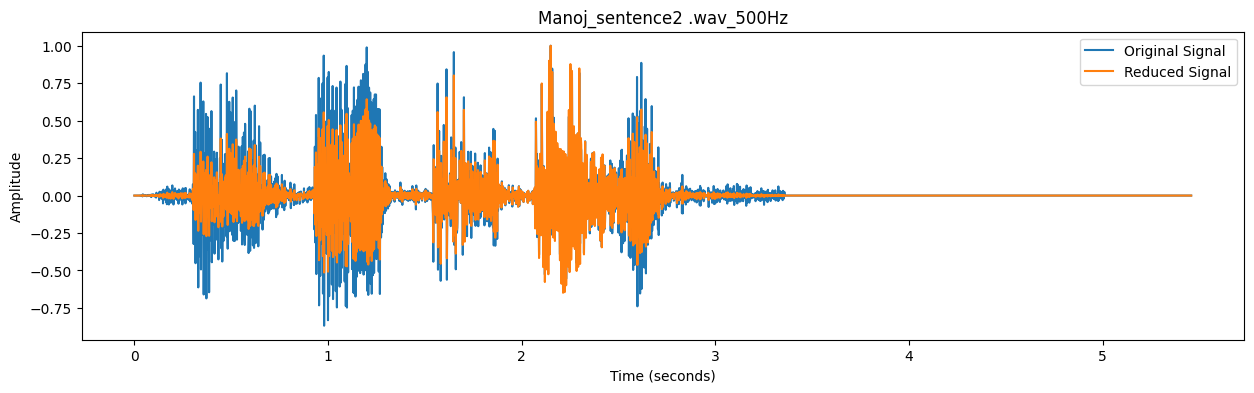

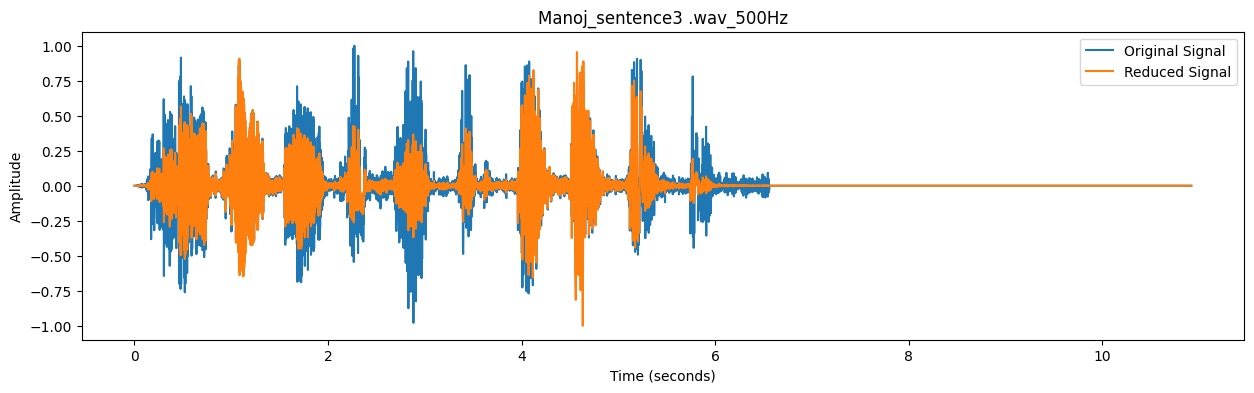

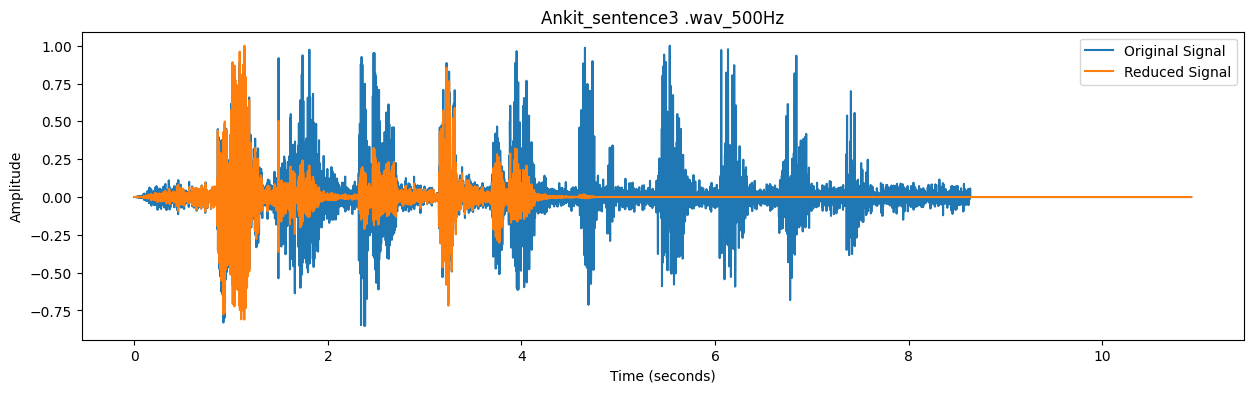

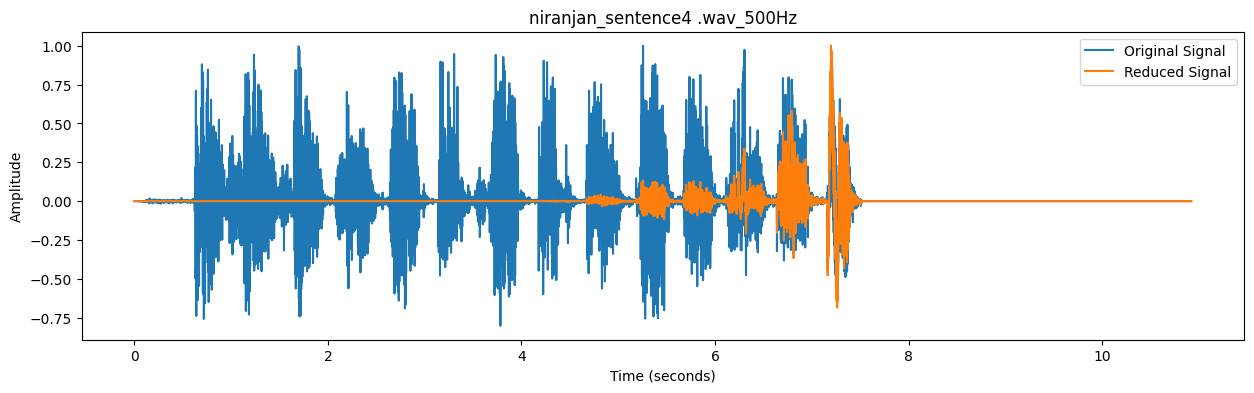

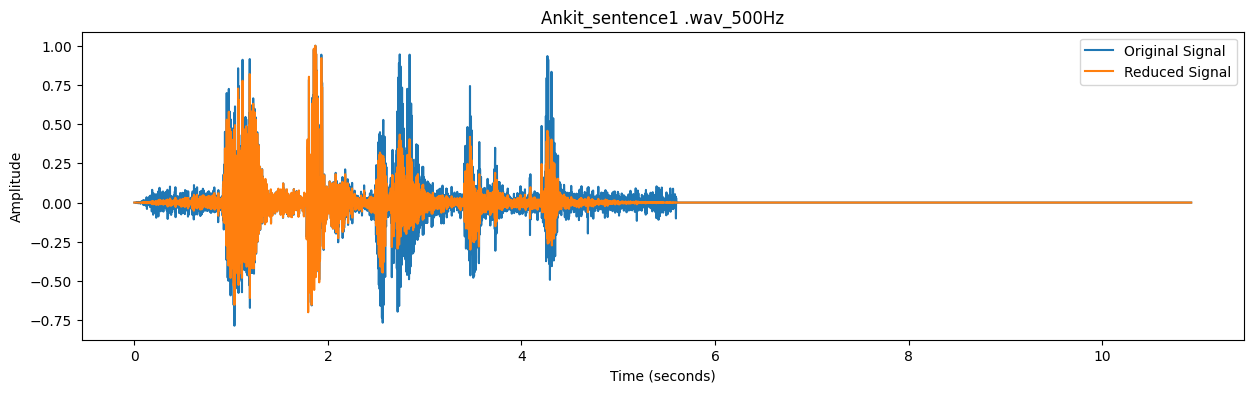

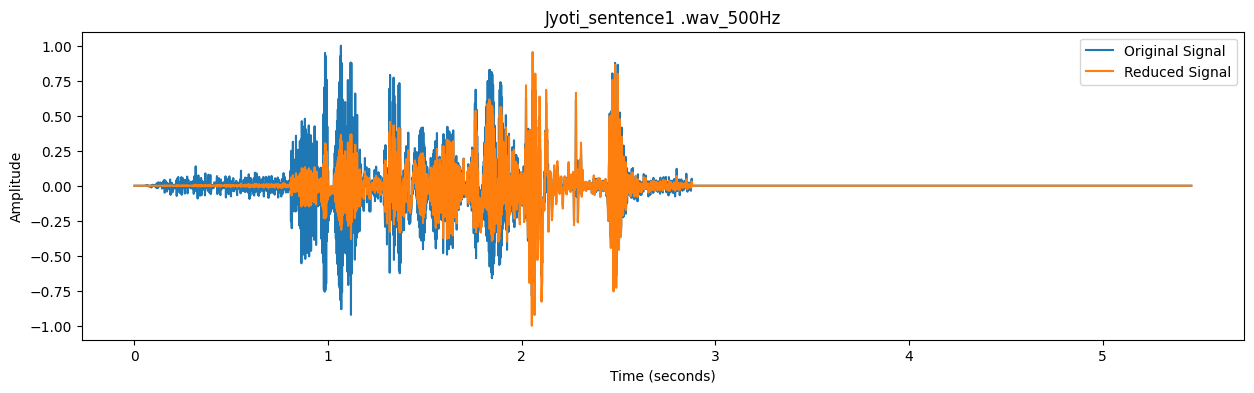

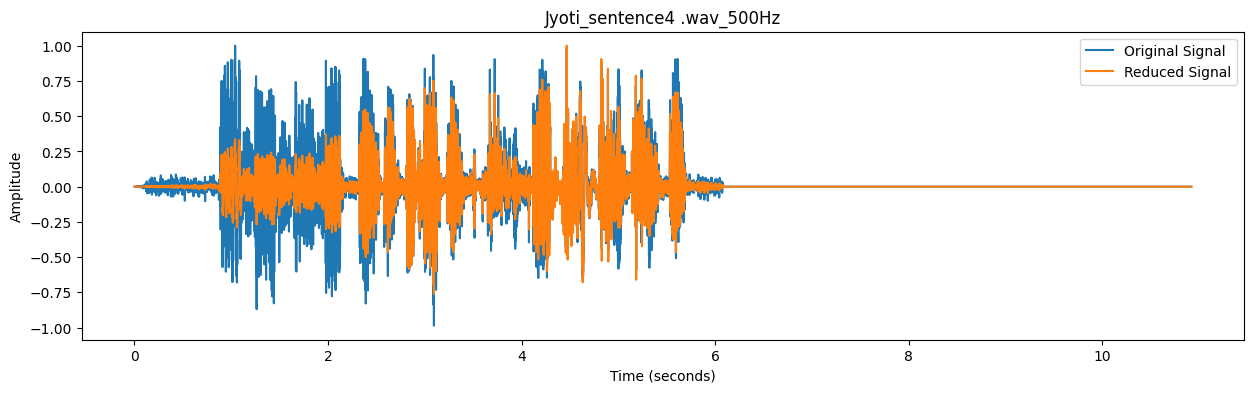

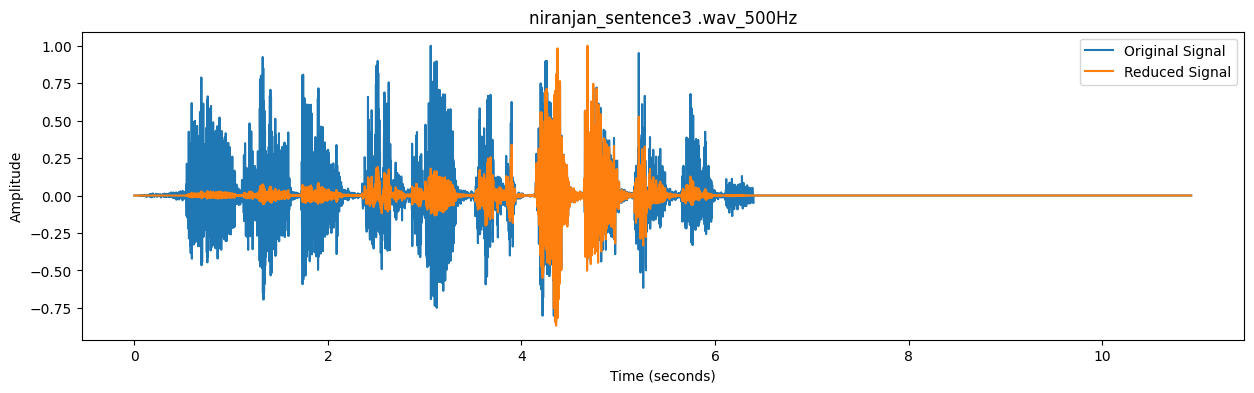

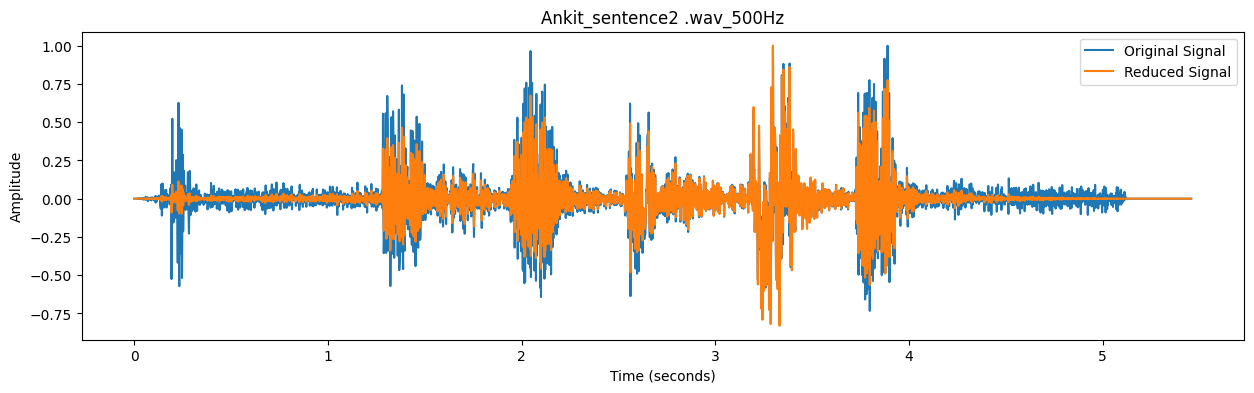

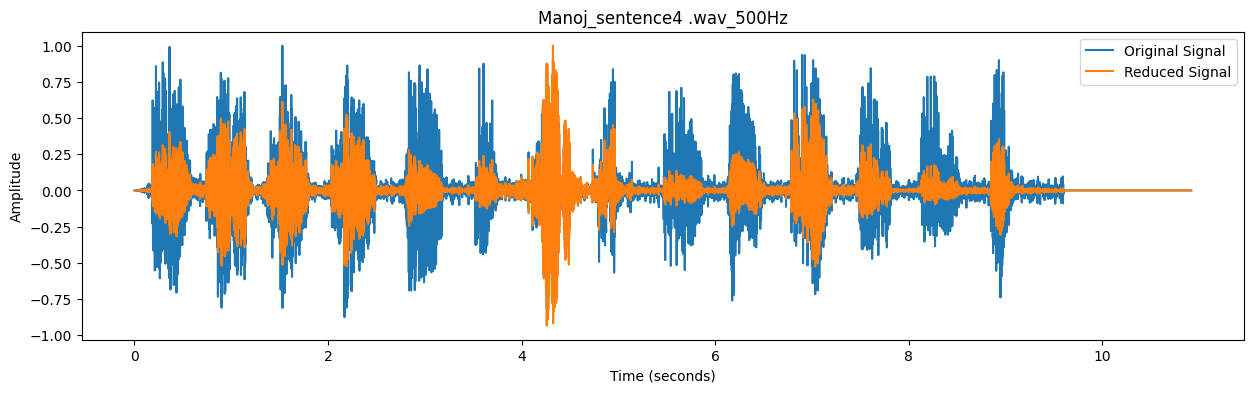

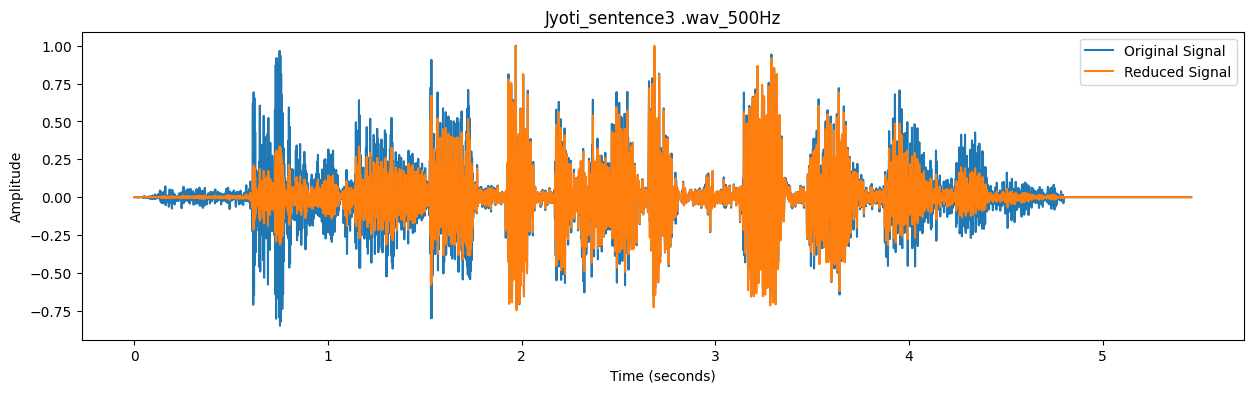

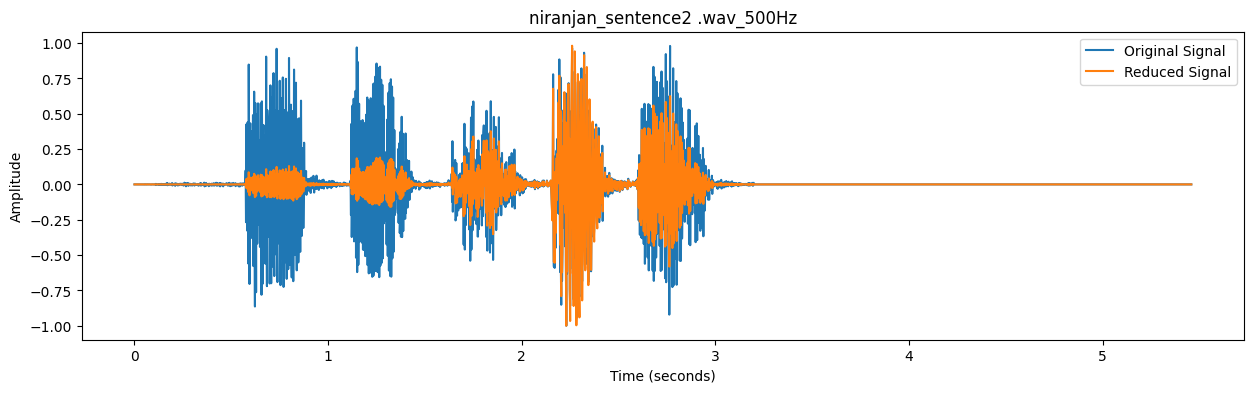

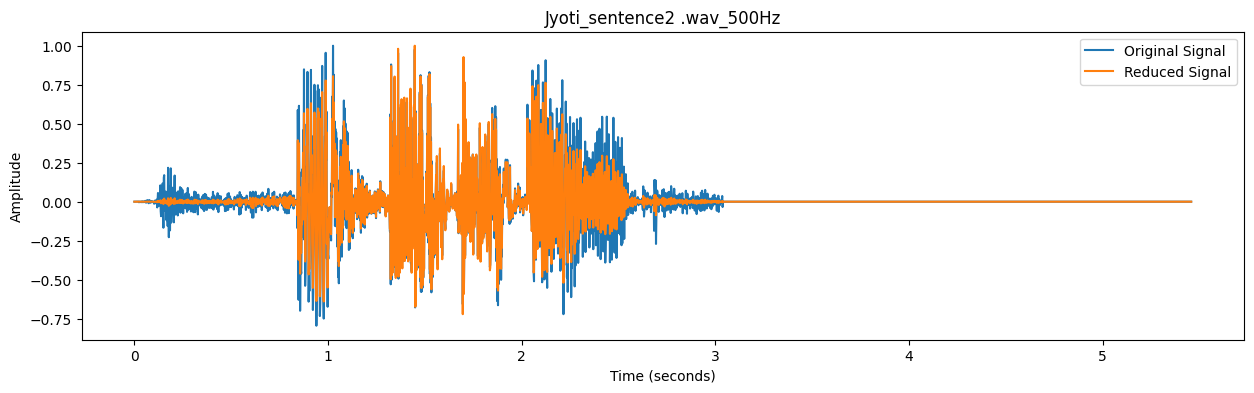

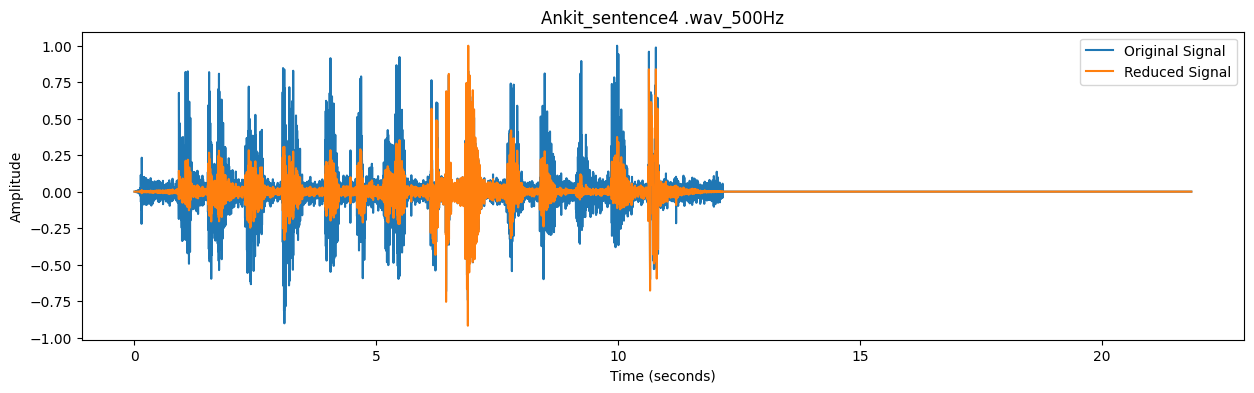

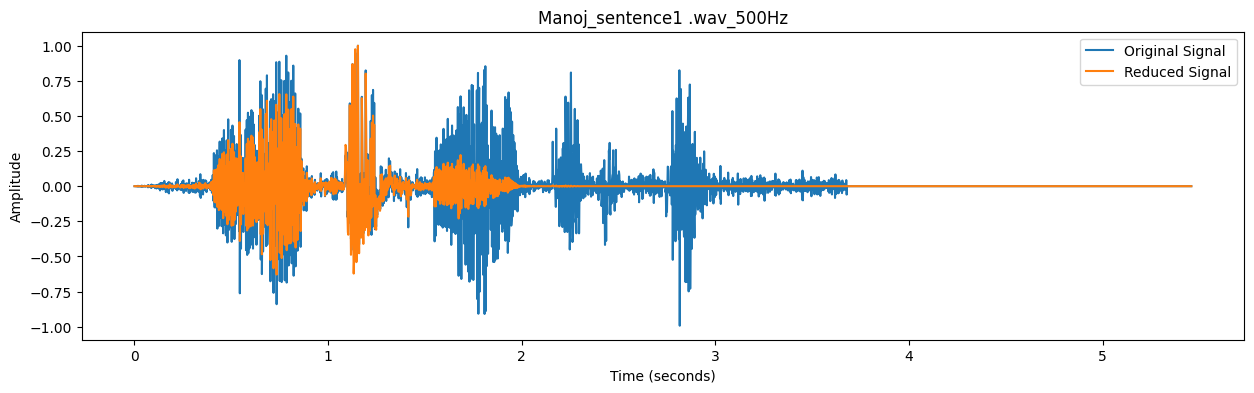

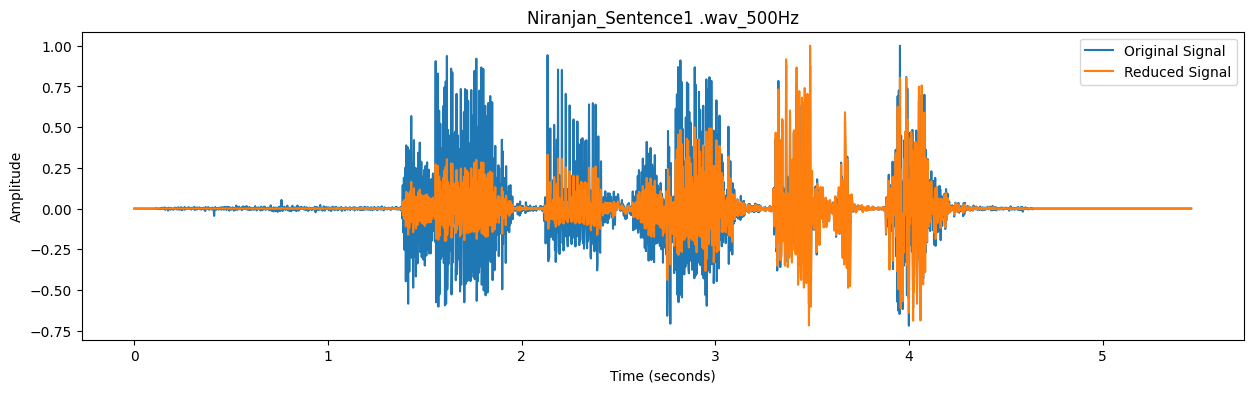

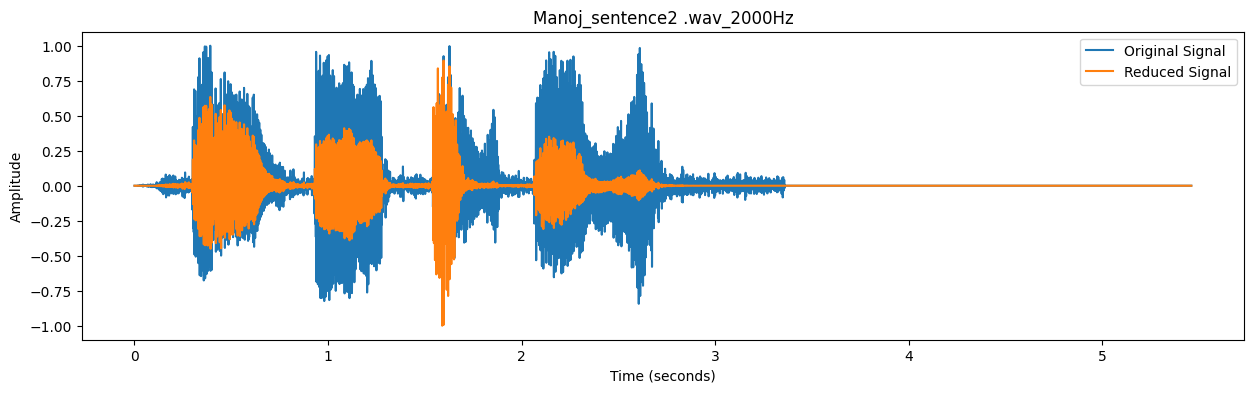

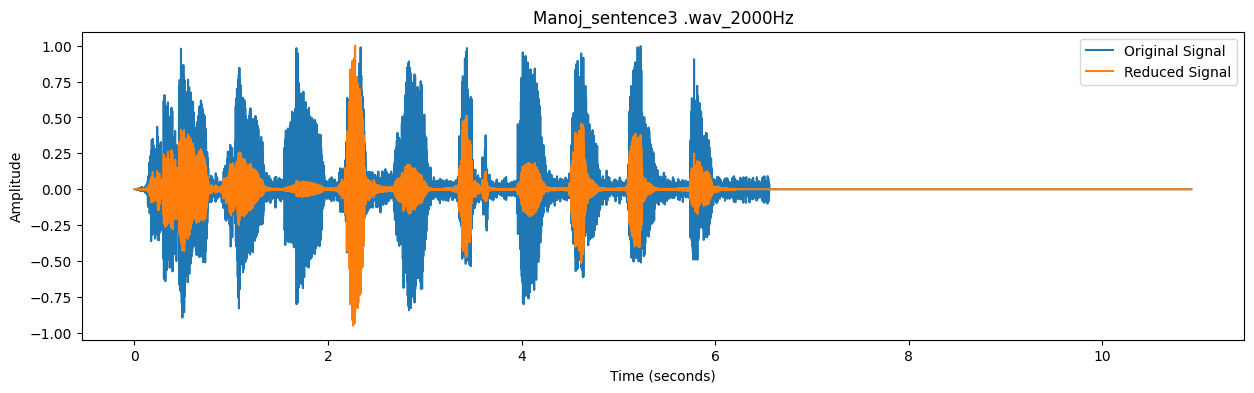

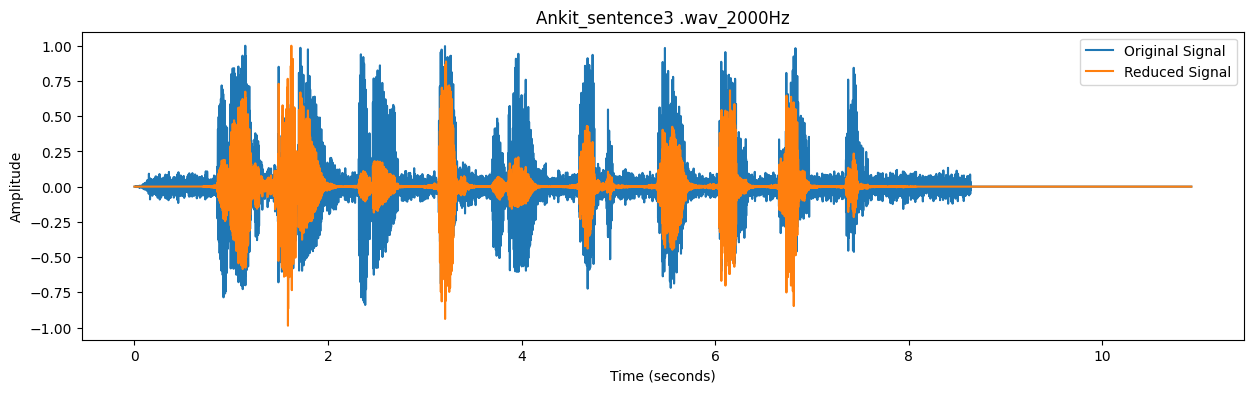

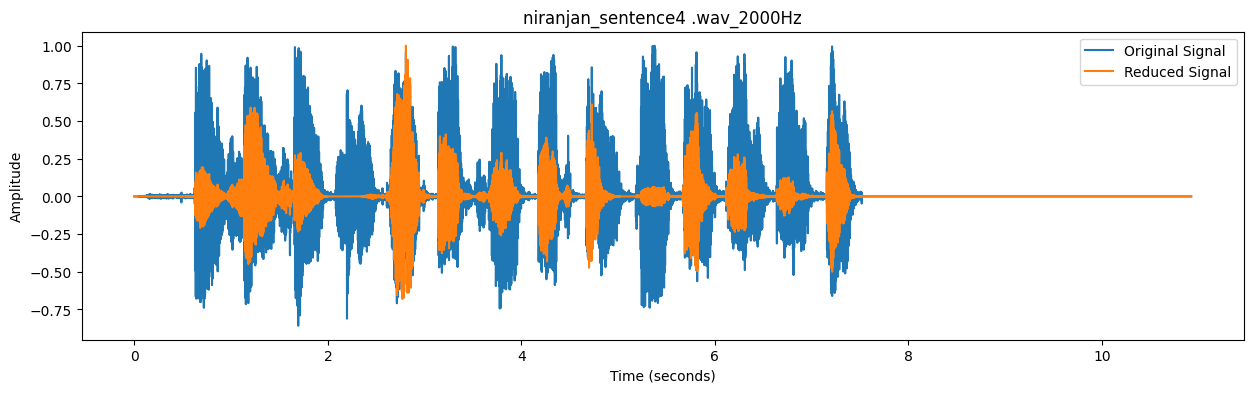

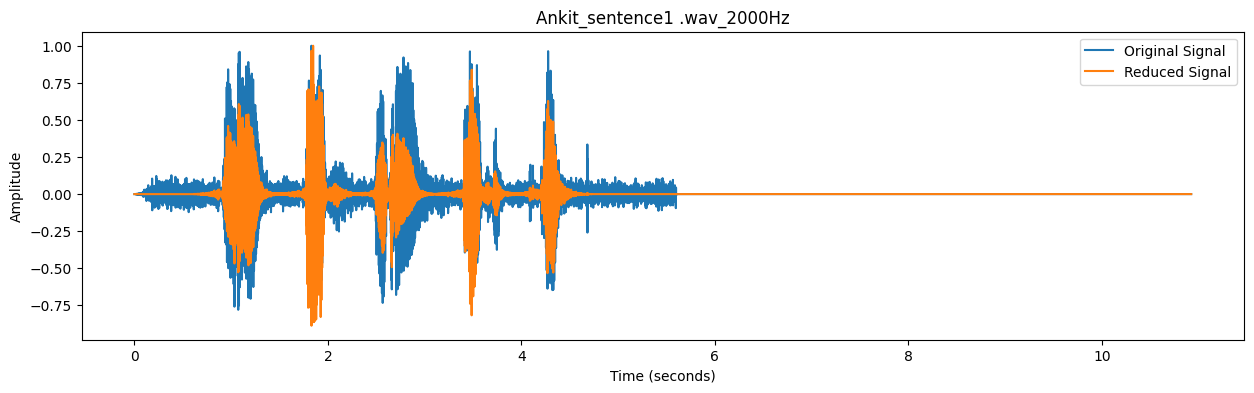

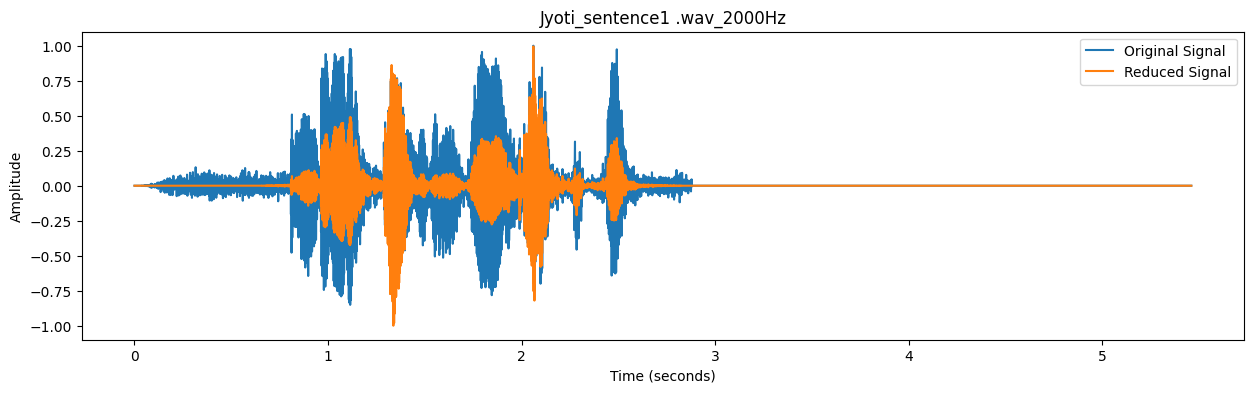

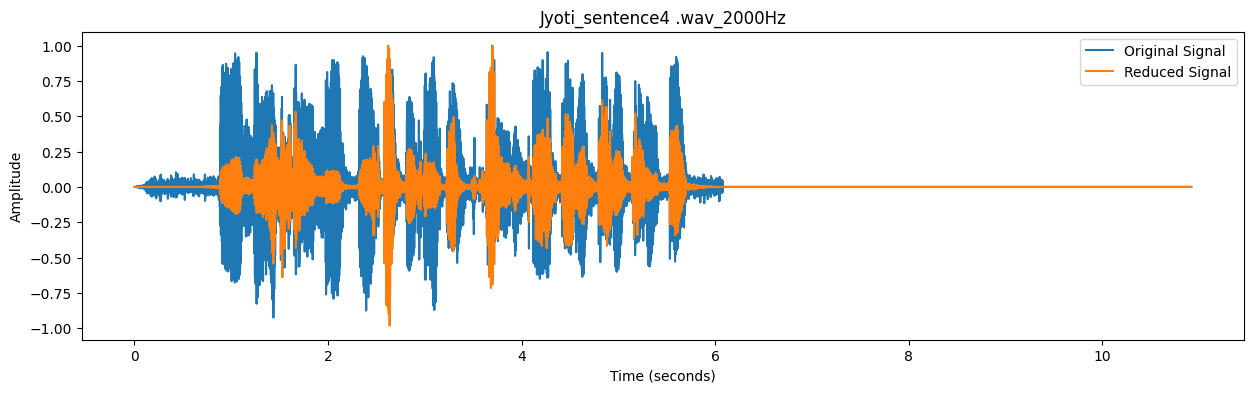

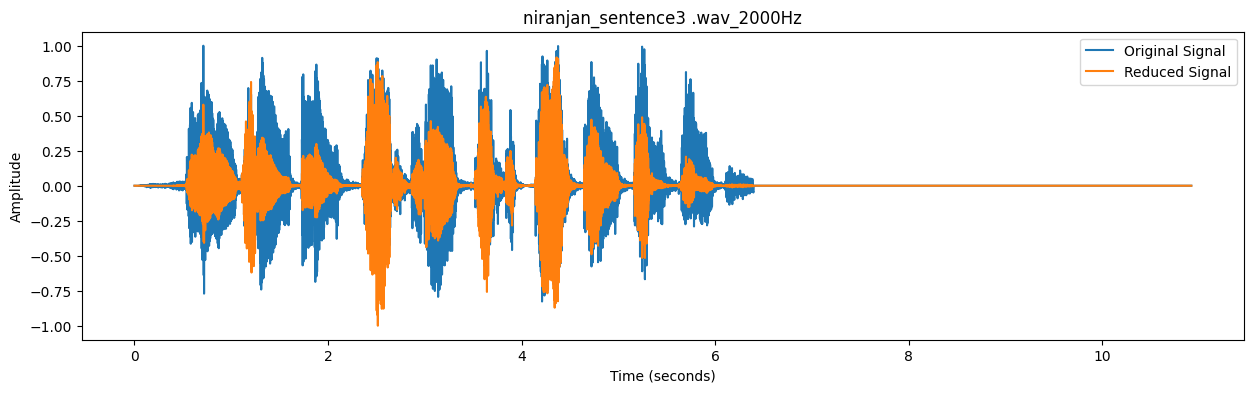

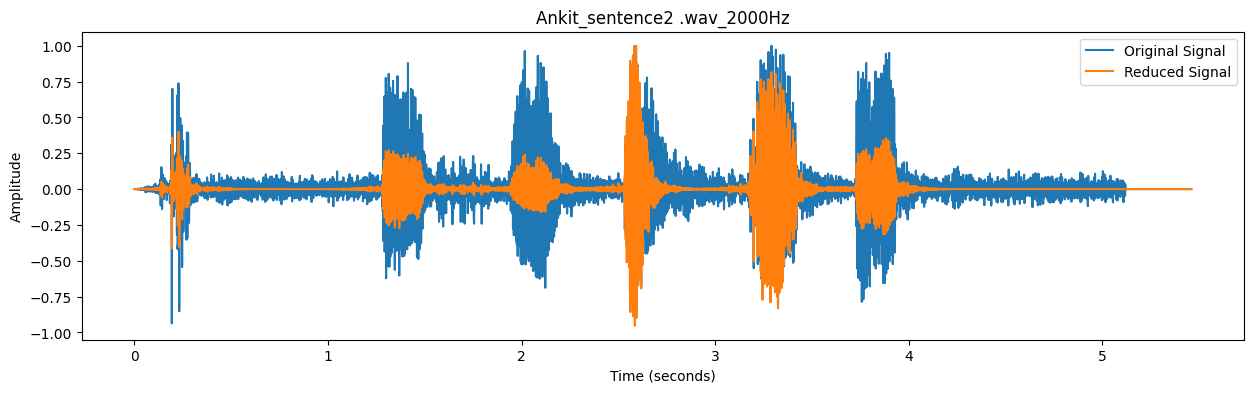

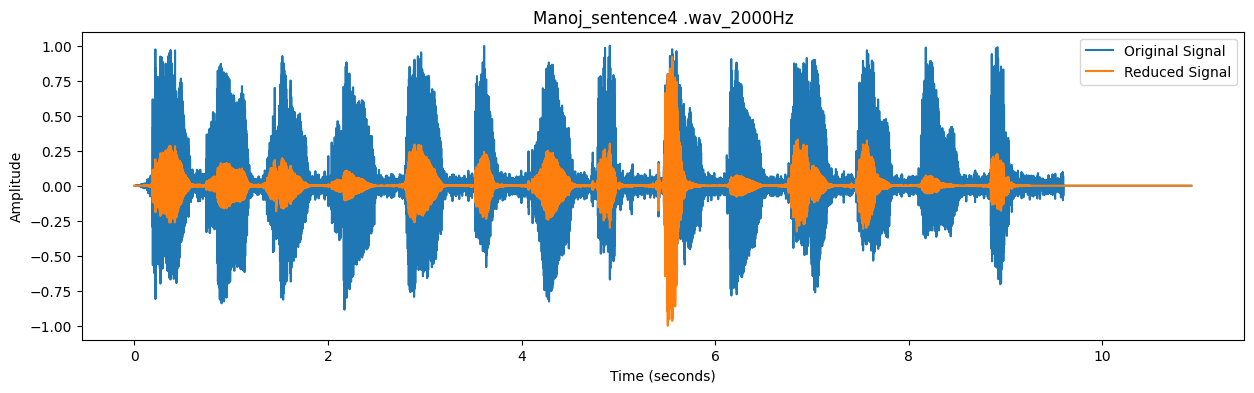

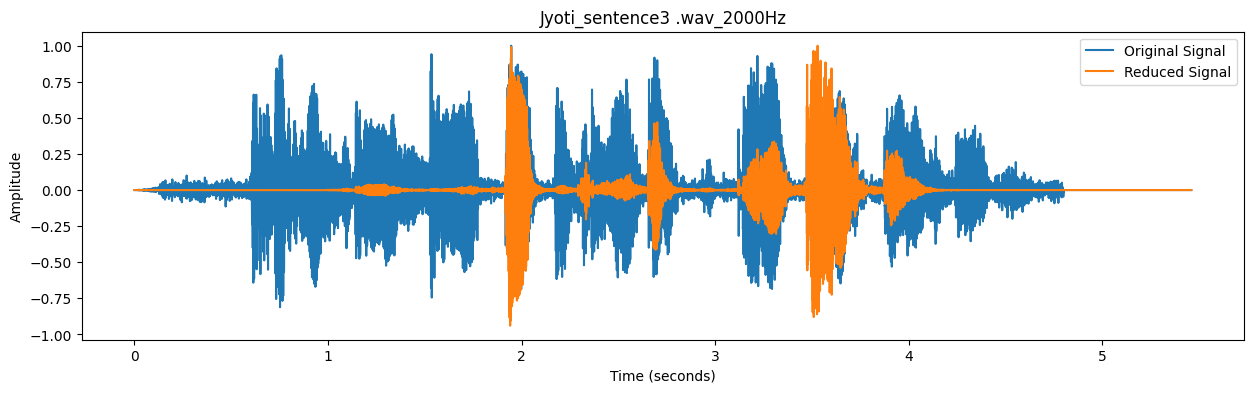

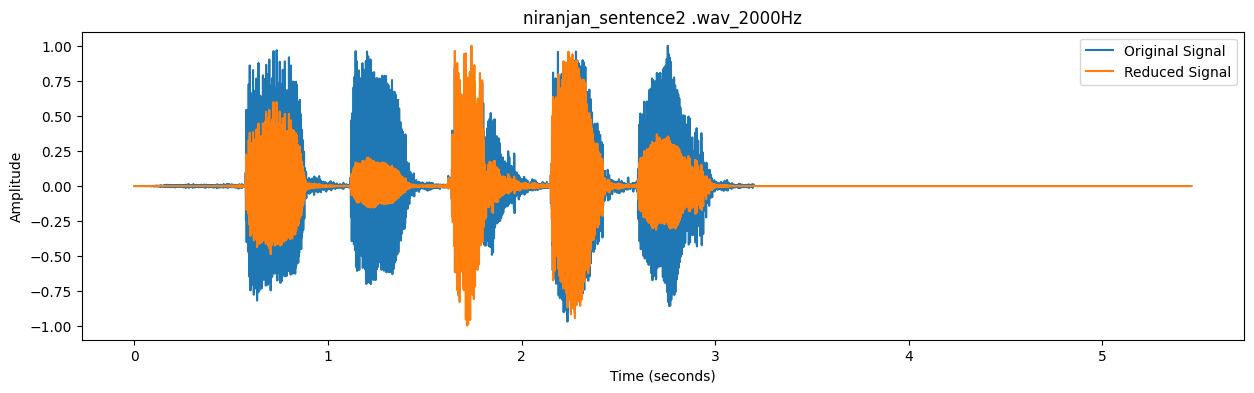

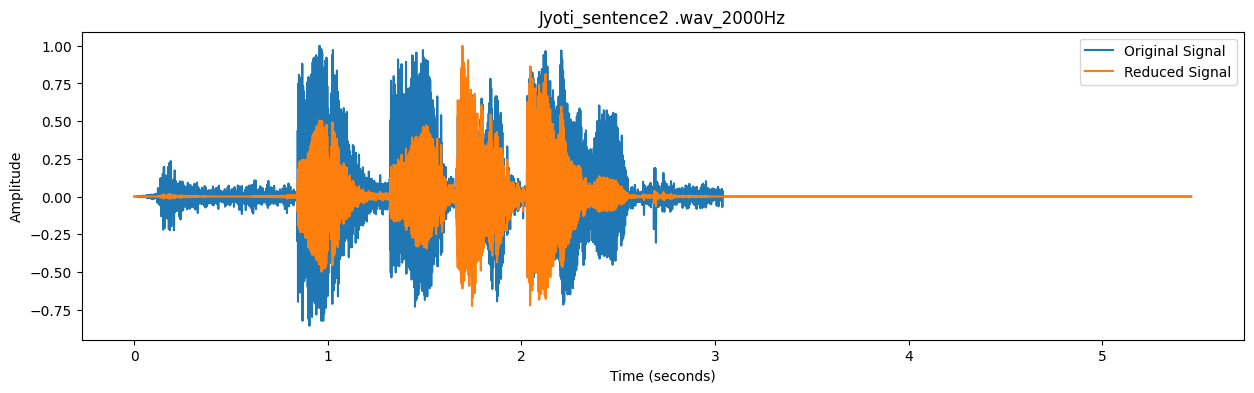

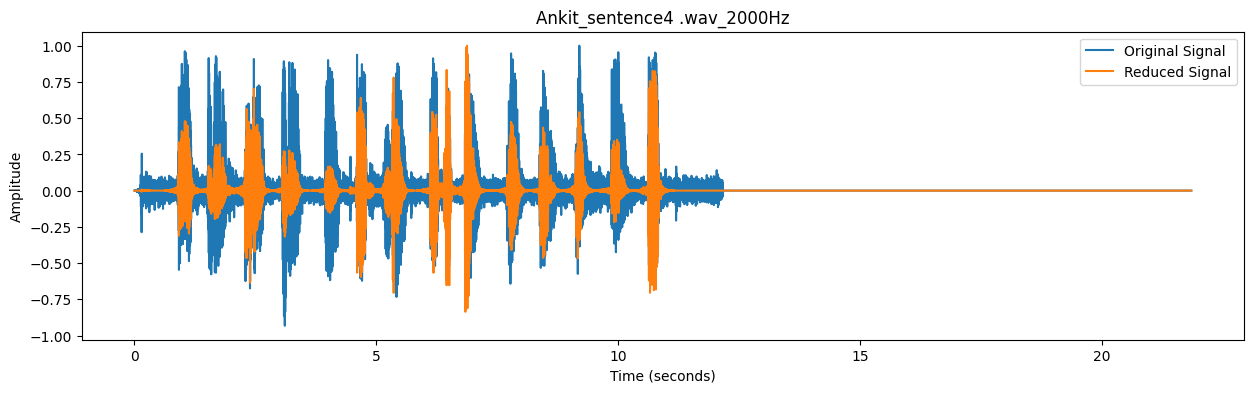

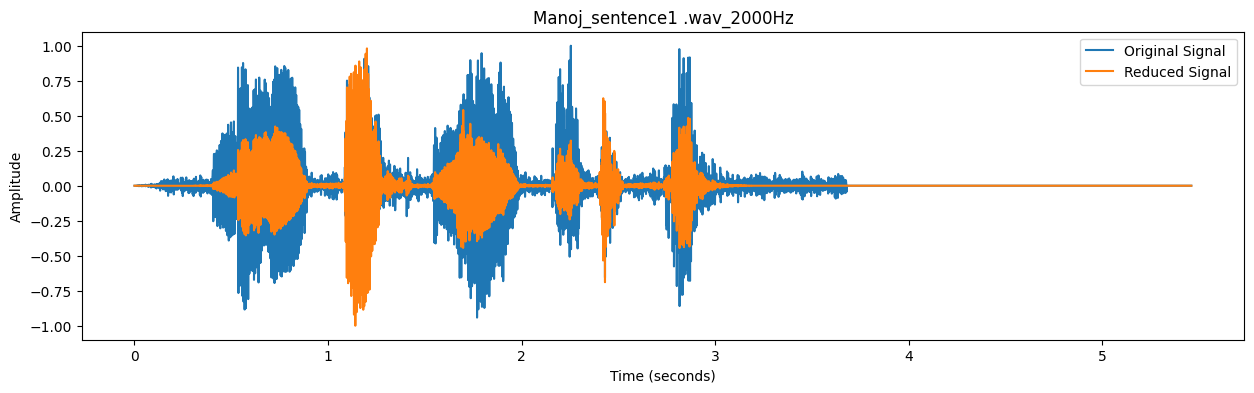

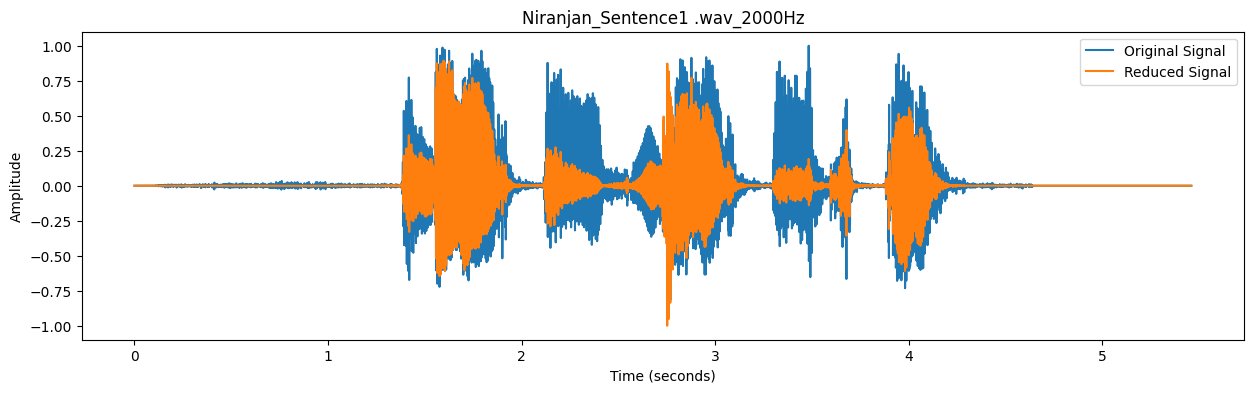

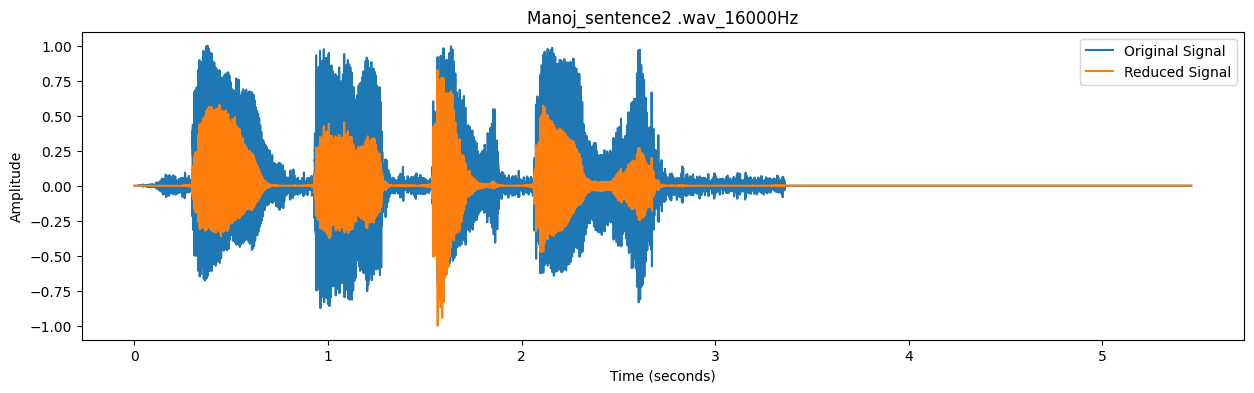

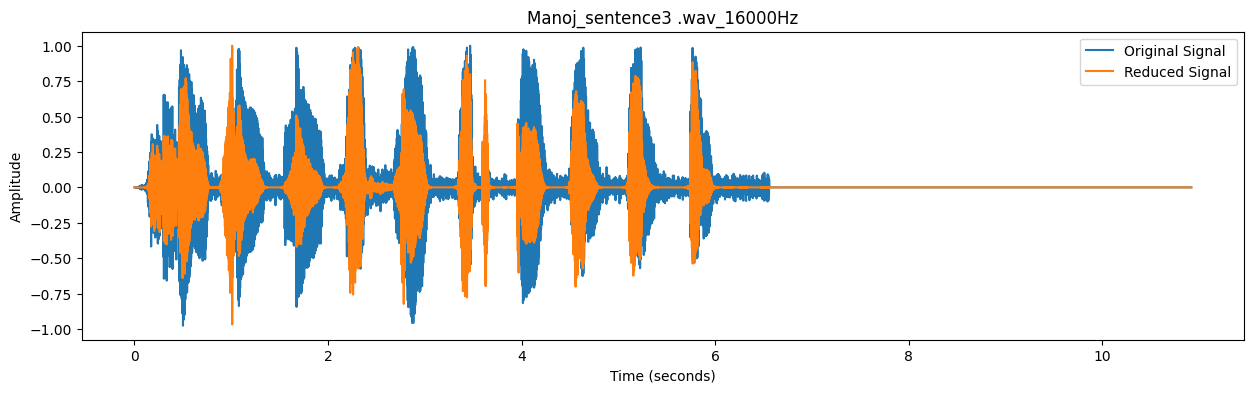

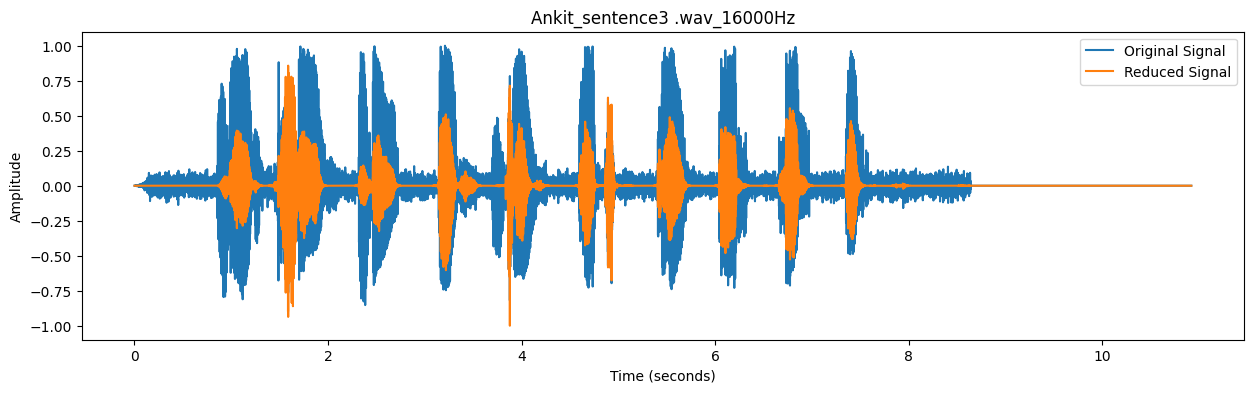

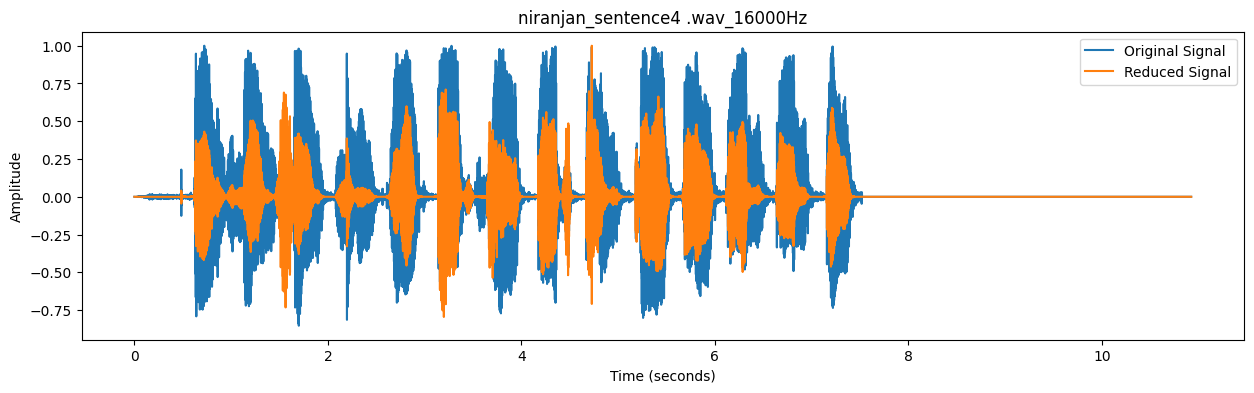

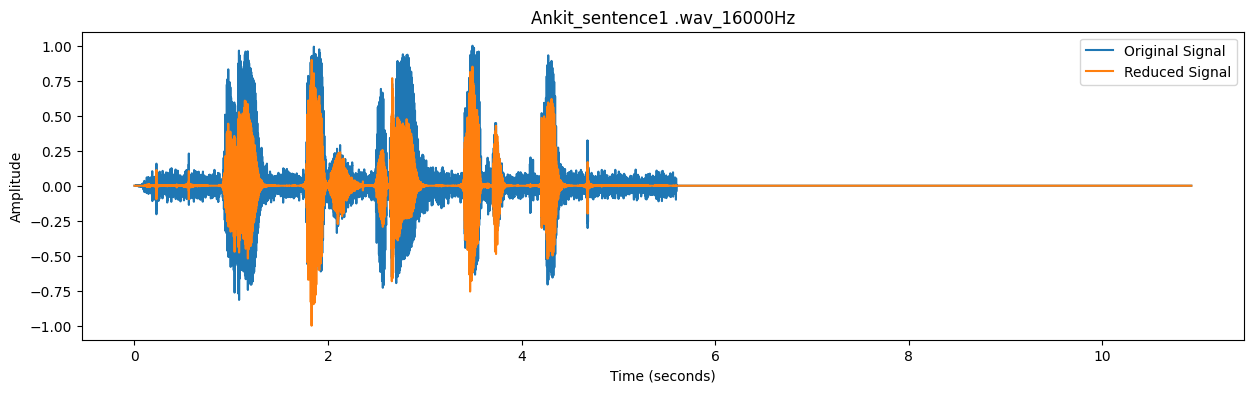

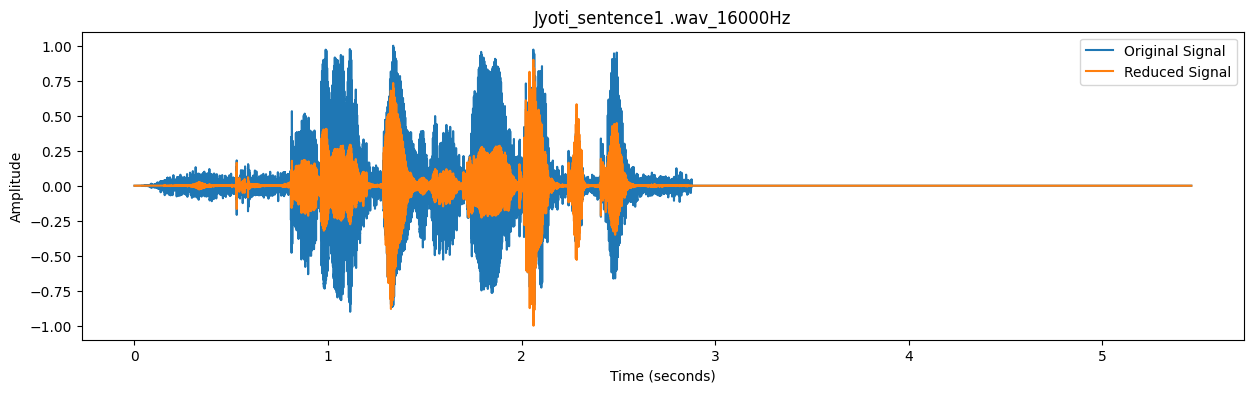

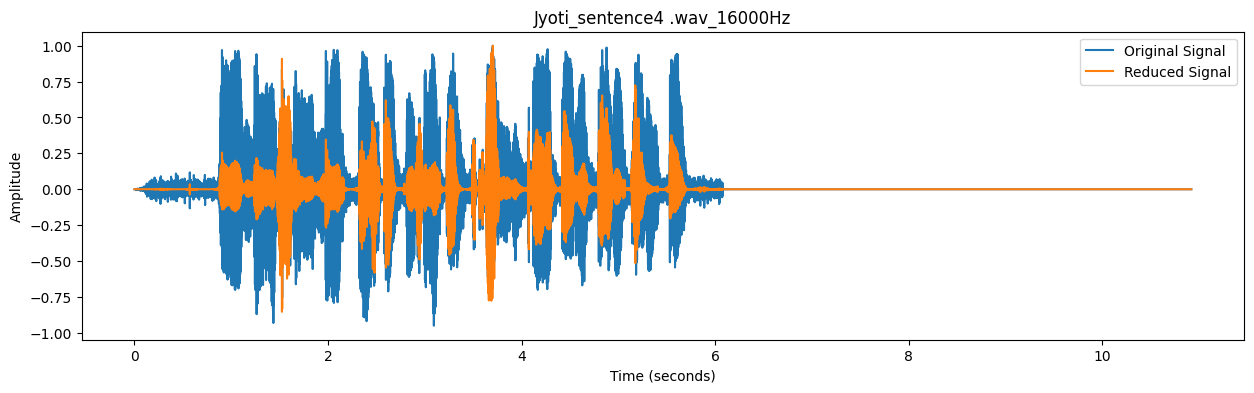

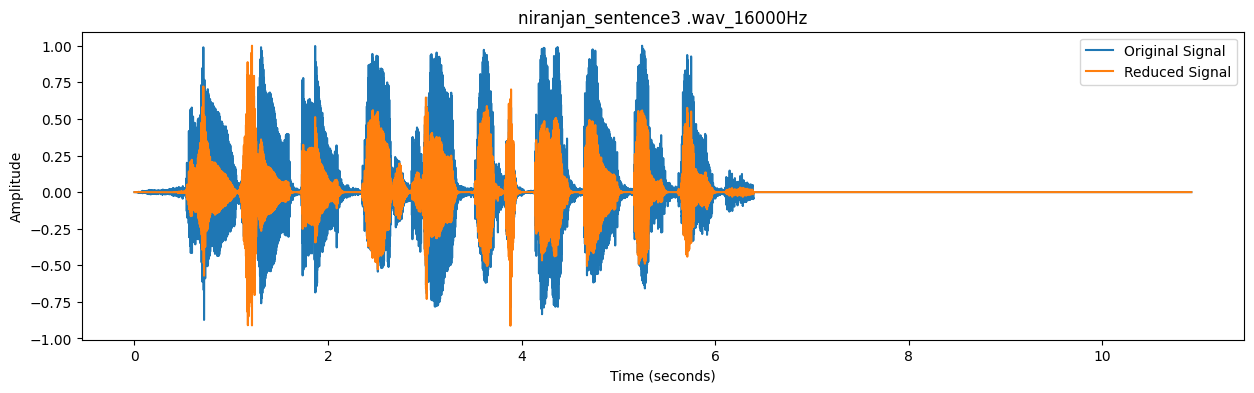

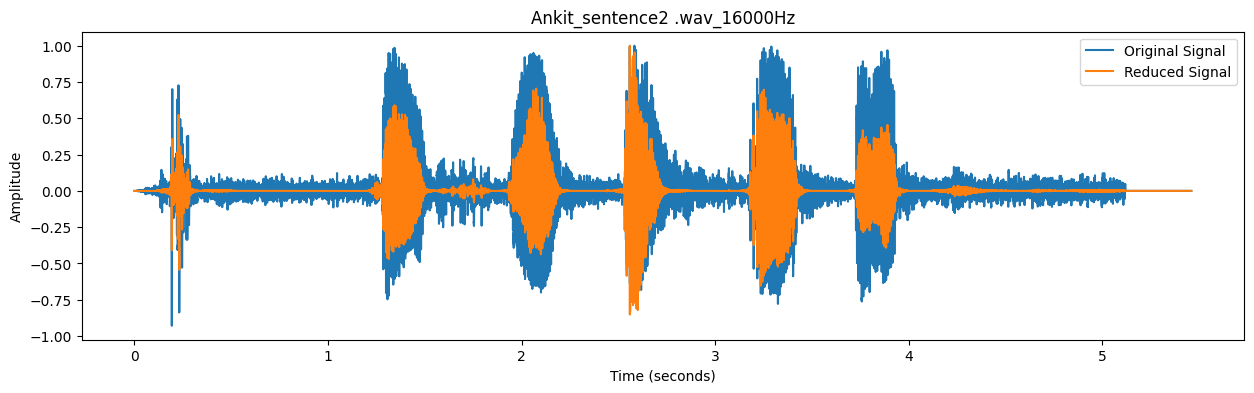

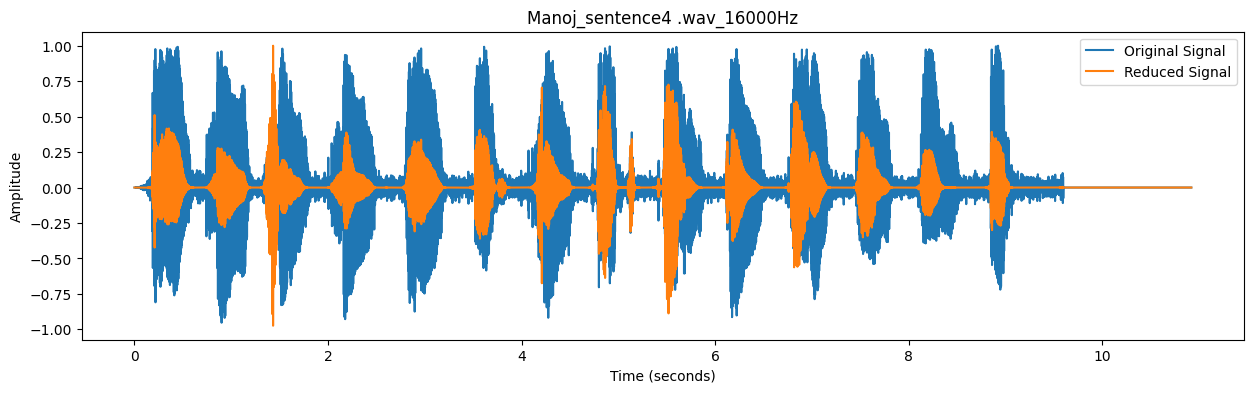

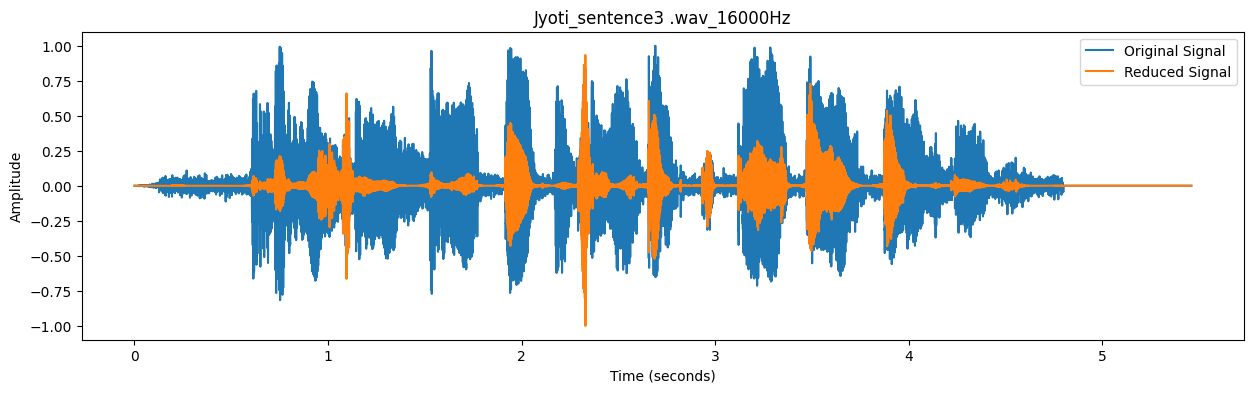

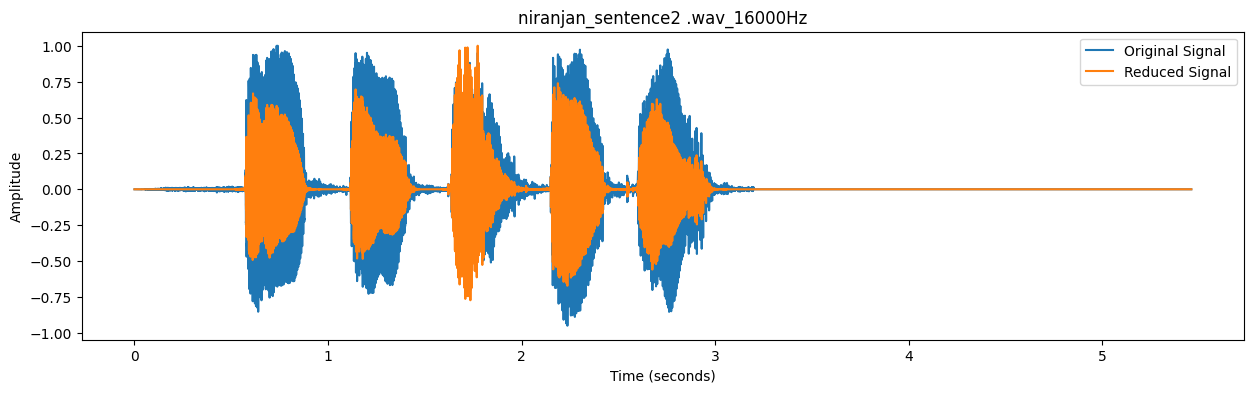

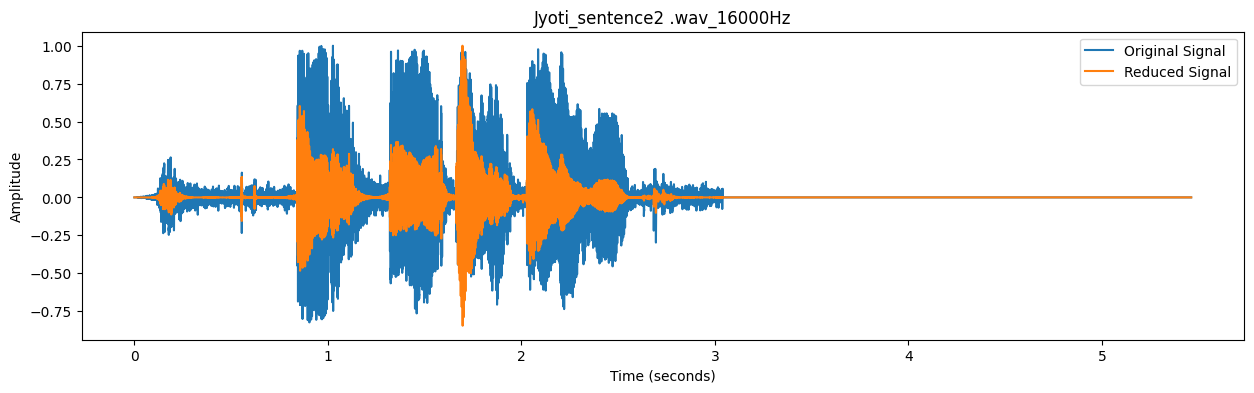

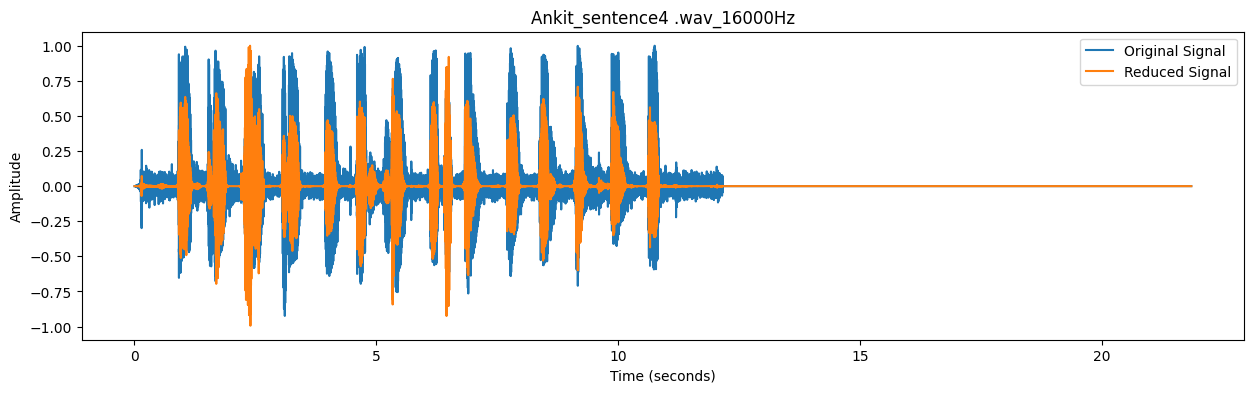

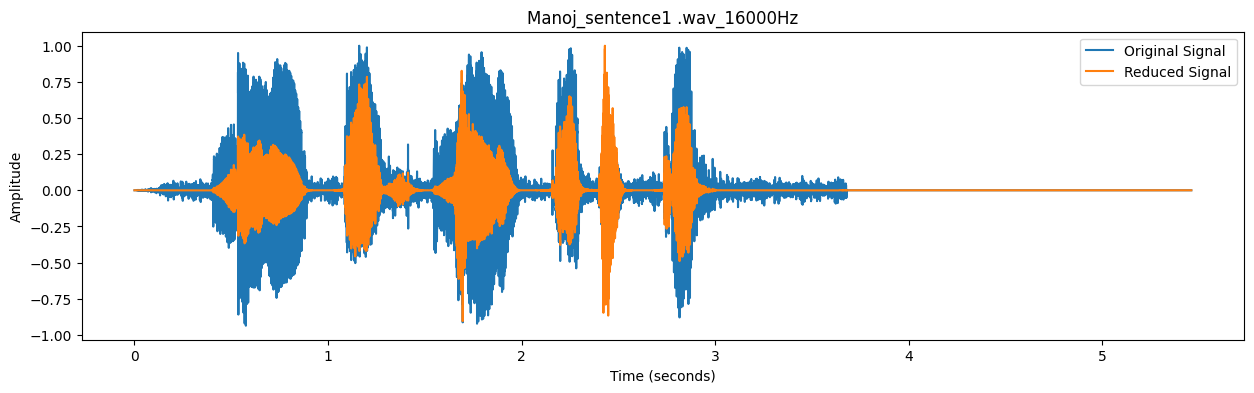

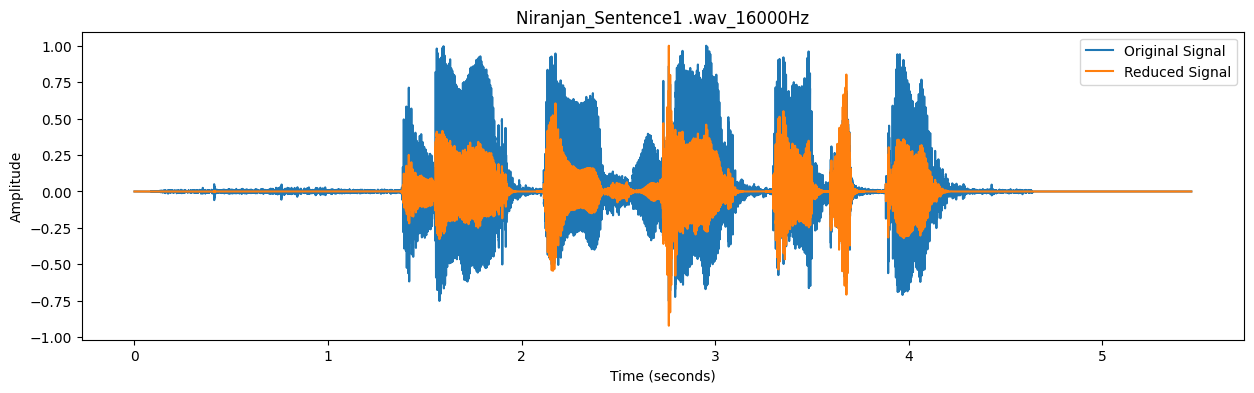

In [ ]:
# Set the directory path
dir_path = '/content/recording'

# Loop through all files in the directory and its subdirectories
for root, dirs, files in os.walk(dir_path):
    sub_dir_path = os.path.split(root)
    if sub_dir_path[-1] == '500Hz':
        for file in files:
            if file.endswith('.wav'):
                # Read the audio signal from the WAV file
                file_path = os.path.join(root, file)
                rate, data = wavfile.read(file_path)
                # Add band-limited noise to the audio signal
                noise_len = 2 # seconds
                noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
                noise_clip = noise[:rate*noise_len]
                audio_clip_band_limited = data+noise
                reduced_noise = nr.reduce_noise(y=audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.235, stationary=True, time_mask_smooth_ms=512)
                # Normalize the audio signals to range from -1 to 1
                data_norm = data / np.max(np.abs(data))
                reduced_noise_norm = reduced_noise / np.max(np.abs(reduced_noise))
                
                # Plot the original and reduced signals on the same plot
                time = np.arange(len(data)) / rate
                fig, ax = plt.subplots(figsize=(15, 4))
                plt.plot(time, data_norm, label='Original Signal')
                plt.plot(time, reduced_noise_norm, label='Reduced Signal')

                plt.xlabel('Time (seconds)')
                plt.ylabel('Amplitude')
                plt.title(f'{file}_500Hz')
                plt.legend()
                plt.show()
                # Save the modified audio signal to a new WAV file
                new_file_path = os.path.join(root, f'{os.path.splitext(file)[0]}_clean.wav')
                wavfile.write(new_file_path, rate, reduced_noise.astype(np.int16))
    if sub_dir_path[-1] == '2000Hz':
      for file in files:
          if file.endswith('.wav'):
              # Read the audio signal from the WAV file
              file_path = os.path.join(root, file)
              rate, data = wavfile.read(file_path)
              # Add band-limited noise to the audio signal
              noise_len = 2 # seconds
              noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
              noise_clip = noise[:rate*noise_len]
              audio_clip_band_limited = data+noise
              reduced_noise = nr.reduce_noise(y=audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5, stationary=True, time_mask_smooth_ms=128)
              # Normalize the audio signals to range from -1 to 1
              data_norm = data / np.max(np.abs(data))
              reduced_noise_norm = reduced_noise / np.max(np.abs(reduced_noise))
              
              # Plot the original and reduced signals on the same plot
              time = np.arange(len(data)) / rate
              fig, ax = plt.subplots(figsize=(15, 4))
              plt.plot(time, data_norm, label='Original Signal')
              plt.plot(time, reduced_noise_norm, label='Reduced Signal')
              plt.xlabel('Time (seconds)')
              plt.ylabel('Amplitude')
              plt.title(f'{file}_2000Hz')
              plt.legend()
              plt.show()
              # Save the modified audio signal to a new WAV file
              new_file_path = os.path.join(root, f'{os.path.splitext(file)[0]}_clean.wav')
              reduced_noise = reduced_noise.astype(np.float32) * 2.0
              wavfile.write(new_file_path, rate, reduced_noise.astype(np.int16))
    if sub_dir_path[-1] == '16000Hz':
      for file in files:
          if file.endswith('.wav'):
              # Read the audio signal from the WAV file
              file_path = os.path.join(root, file)
              rate, data = wavfile.read(file_path)
              # Add band-limited noise to the audio signal
              noise_len = 2 # seconds
              noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
              noise_clip = noise[:rate*noise_len]
              audio_clip_band_limited = data+noise
              reduced_noise = nr.reduce_noise(y=audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5, stationary=True)
              # Normalize the audio signals to range from -1 to 1
              data_norm = data / np.max(np.abs(data))
              reduced_noise_norm = reduced_noise / np.max(np.abs(reduced_noise))
              
              # Plot the original and reduced signals on the same plot
              time = np.arange(len(data)) / rate
              fig, ax = plt.subplots(figsize=(15, 4))
              plt.plot(time, data_norm, label='Original Signal')
              plt.plot(time, reduced_noise_norm, label='Reduced Signal')
              plt.xlabel('Time (seconds)')
              plt.ylabel('Amplitude')
              plt.title(f'{file}_16000Hz')
              plt.legend()
              plt.show()
              # Save the modified audio signal to a new WAV file
              new_file_path = os.path.join(root, f'{os.path.splitext(file)[0]}_clean.wav')
              wavfile.write(new_file_path, rate, reduced_noise.astype(np.int16))

## Save a folder

In [ ]:
import os
from google.colab import files

# Set the directory path
dir_path = '/content/recording'

# Create a zip file of the directory
zip_file_path = '/content/recording.zip'
os.system(f'zip -r {zip_file_path} {dir_path}')

# Download the zip file
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>